# Liu Xingyu - DAV 6150 - Project 3

## Introduction

In this report, I will analyze on a data set consisting of physical characteristics and price of diamonds to compare the performance of gradient descent-based models. I will construct Decision Tree Model, Random Forest Model, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier, XG Boost Classifier one by one, and measure their performance using metrics and ROC curve. This information could be used to learn how well could algorithms that are
based on gradient descent concepts perform relative to both each other and other types of models.

To accomplish this, I will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of the data. 

Then, based on the results of my EDA, I will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by my domain knowledge and EDA, and will be explained further in that section. I will again perform an EDA on my transformed data, in order to see the effects of my transformations on the data. I will compare the results of our transformed data to those of the original data and discuss how my transformations will lead to a better machine learning model.

After the data preparation I will perform feature selection and/or dimensionality reduction.

Then I will split the data into training and testing subsets, use the training subset to construct Decision Tree Model, Random Forest Model, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier, XG Boost Classifier
using same combinations of four explanatory variables.

Lastly, I will choose the best classification model from those I constructed using some metrics, fit this model with the testing data to see how my model performs. 

## Data Profiling & Domain Knowledge Development

**price** - price in US dollars (326 dollars -- 18,823 dollars)

**carat** - Carat is a unit of mass equal to 200 mg and is used for measuring gemstones and pearls, weight of the diamond (0.2--5.01)

**cut** - Cut grade is is an objective measure of a diamond’s light performance, or, what we generally think of as sparkle, quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** - diamond colour, from D (best) to J (worst), 'D,E,F' are colorless, 'G,H,I,J' are near colorless.

**clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** - length in mm (0--10.74)

**y** - width in mm (0--58.9)

**z** - depth in mm (0--31.8)

**depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** - width of top of diamond relative to widest point (43--95)

## Exploratory Data Analysis

First I will read the data into python using pandas read xls function. Then I will look for missing and/or invalid data values and perform an exploratory data analysis on my dataset to determine what data need to be prepared for a future machine learning model. 

In [223]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

import pandas as pd
diamond = pd.read_excel("Project3_Data.xls")

#check results
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [224]:
# check the dataset for null values
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

I could see that there is no missing values in the diamond data set.

In [225]:
## Check the types of the data
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

From above, I see that variables carat, depth, table, price, x, y and z are numeric variables, while cut, color and clarity are categorical variables.

In [226]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We see from above that the range of data set do not contain negative values. From my domain knowledge and research, there should not be negative values for these attributes. So there is no need to deal with negative values.

The mean value of carat is 0.797940, the mean value of depth is 61.749405, the mean value of table is 57.457184, the mean value of price is 3932.788722, the mean value of x is 5.731157, the mean value of y is 5.734526, the mean value of z is 3.538734. The mean value of price is much bigger than other variables, the mean value of carat is much lower than other variables. Also, the std of price is much higher than other variables'std, the std of carat is much lower than other variables'std, So the data need to be normalized or standarized, I will demonstrate further to show how will I deal with this.

Next I will look at the distributions of my data to identify the shape of the distribution as well as identify any potential outliers.

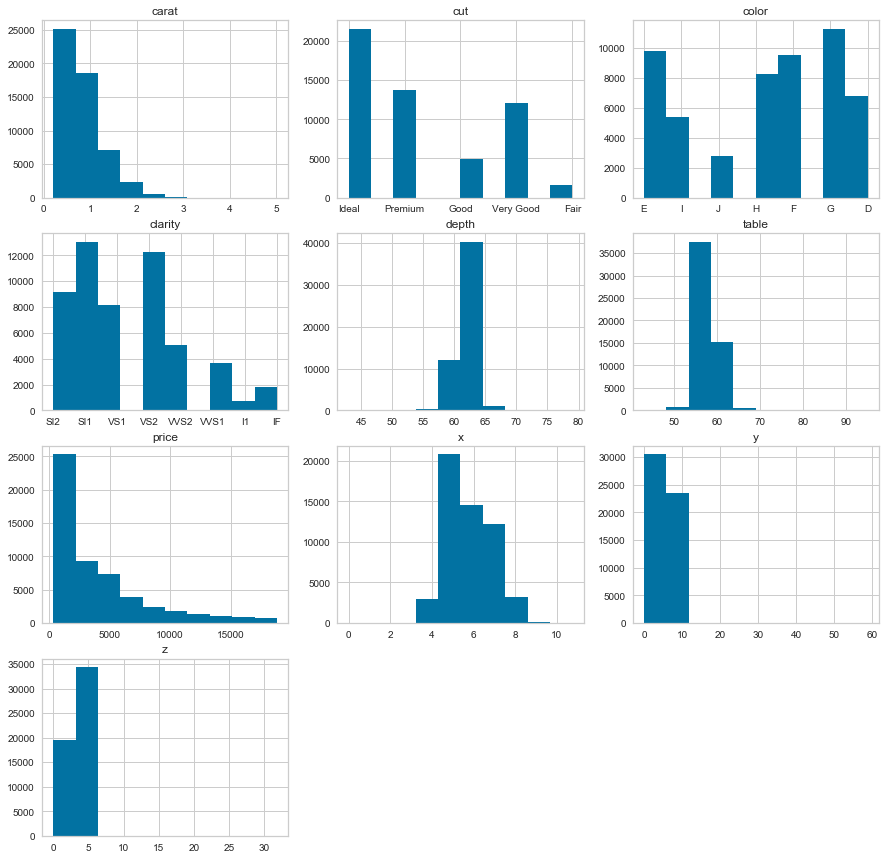

In [227]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(15,15))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=diamond.columns.tolist()
for k in columns[0:] :  
    plt.subplot(4,3,j) 
    plt.hist(diamond[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the above histograms, I see that the majority of my attributes are of no pattern. The variables carat, price and y are approximately skewed distributions, the variables x is approximately normal distributed. 

Next I will look at boxplots of the numeric data to see if there are any outliers.

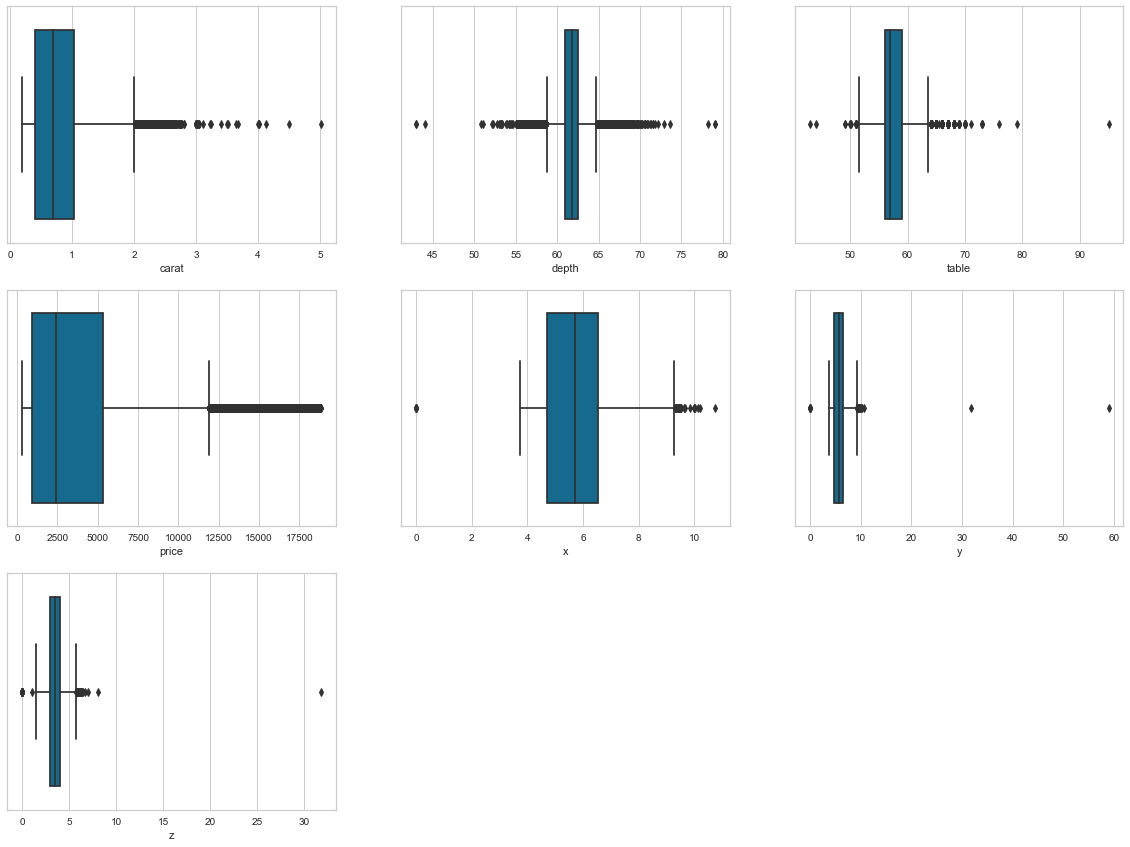

In [228]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,20))

diamondn = diamond[['carat','depth','table','price','x','y','z']]
#use an index to identify the spot of the subplot
j=1
columns=diamondn.columns.tolist()
for k in columns[0:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(4,3,j) 
    sns.boxplot(x=k,data=diamondn)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

From the above boxplots I see that most of attributes have numerous outliers. I will discuss further below how I will deal with these outliers.

I will also check a correlation matrix between the variables before any transformation to see if my transformations have any effect on the correlation.

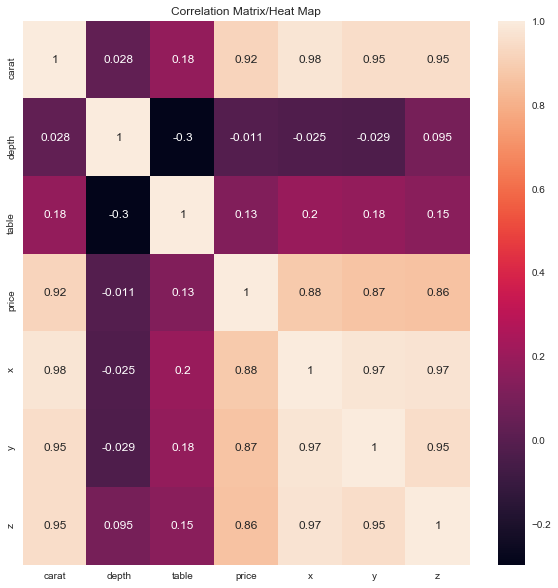

In [229]:
#next get correlation matrix and plot it using seaborn
plt.figure(figsize=(10, 10)) #set figure size
corrMatrix = diamond.corr() #get correlation matrix
sns.heatmap(corrMatrix, annot=True) #graph correlation matrix
plt.title('Correlation Matrix/Heat Map') 
plt.show()

I see from correlation matrix that lots of attributes have a particularly strong correlation. x and carat have correlation of 0.98, x and z have correlation of 0.97, x and y have correlation of 0.97, y and z have correlation of 0.95, y and carat have correlation of 0.95, z and carat have correlation of 0.95, price and carat have correlation of 0.92, price and x have correlation of 0.88, price and y have correlation od 0.87, price and z have correlation of 0.86. From my domain knowledge, sice z is calculated from x and y, so the correlations among x, y and z are reasonable.

In [230]:
#Check whether there are mistakes and omissions on categorical variables.
classes = ['cut', 'color','clarity']

for each in classes:
    print(each + ':\n')
    print(list(diamond[each].drop_duplicates()))
    print('\n')

cut:

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']


color:

['E', 'I', 'J', 'H', 'F', 'G', 'D']


clarity:

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']




From above I see that, variable cut has five labels, color has seven labels, clarity has eight labels. Those are the same with the domain knowledge given.

In [231]:
## Summarize the categorical data by using the function value_counts().
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [232]:
## Summarize the categorical data by using the function value_counts().
diamond['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [233]:
## Summarize the categorical data by using the function value_counts().
diamond['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

I could see from above that the Ideal cut occupied large proportion of 'cut', while the Fair cut occupies the least proportion of 'cut', the colorless diamond occupies large proportion of 'color', the near colorless diamond occupies not that much proportion of 'color', SI2 occupies the largest proportion of 'clarity'.

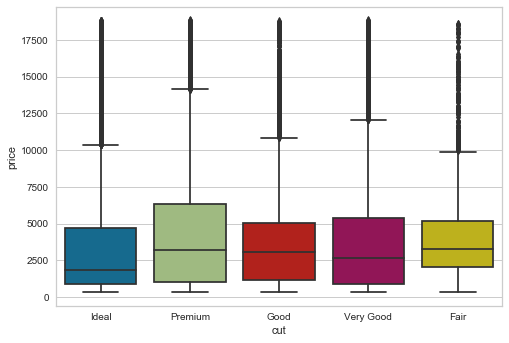

In [234]:
## plot boxplots with categorical variable cut
sns.boxplot(x='cut',y='price',data = diamond)

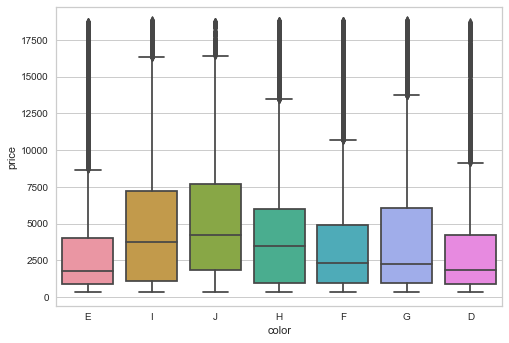

In [235]:
## plot boxplots with categorical variable color
sns.boxplot(x='color',y='price',data = diamond)

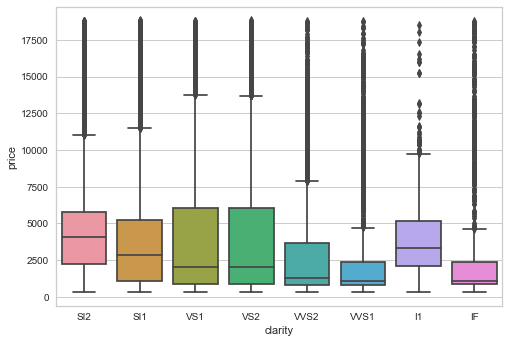

In [236]:
## plot boxplots with categorical variable cut
sns.boxplot(x='clarity',y='price',data = diamond)

From above I could see that the price of diamond with Fair cut has most outliers, the price of diamond with color E has most outliers, the price of diamond with clarity WS1 and IF has most outliers. Also, from the boxplot, I could also see that the diamond with Premium and Fair cut has highest mean of price, the diamond with Ideal cut has the lowest mean of price, the diamond with color J has highest mean of price, the diamond with color E has the lowest mean, the diamond with clarity SI2 has the highest mean of price, the diamond with clarity WS1 has the lowest mean of price.

In [237]:
## Group the numeric variables by categorical variables 
data_group = diamond[['cut','color','price']]
grouped_avg = data_group.groupby(['cut','color'],as_index=False).mean()
grouped_avg

,cut,color,price
0,Fair,D,4291.061350
1,Fair,E,3682.312500
2,Fair,F,3827.003205
3,Fair,G,4239.254777
4,Fair,H,5135.683168
5,Fair,I,4685.445714
6,Fair,J,4975.655462
7,Good,D,3405.382175
8,Good,E,3423.644159
9,Good,F,3495.750275


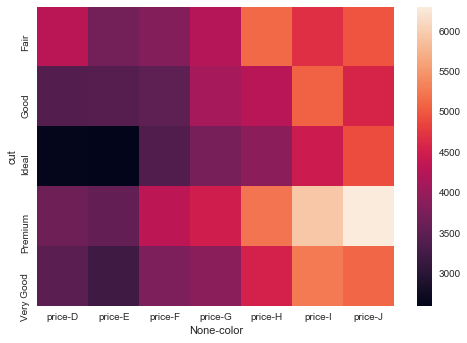

In [238]:
pivot_table = grouped_avg.pivot(index = 'cut',columns = 'color')
sns.heatmap(pivot_table)
plt.show()

I see from above that the diamond with Premium cut and color J has the highest price 6294.591584, the diamond with Ideal Cut and color E has the lowest price 2597.550090.

From heatmap, the cut Ideal has the highest correlation with Color E in price.

In [239]:
## Group the numeric variables by categorical variables 
data_group = diamond[['clarity','color','price']]
grouped_avg = data_group.groupby(['clarity','color'],as_index=False).mean()
grouped_avg

,clarity,color,price
0,I1,D,3863.023810
1,I1,E,3488.421569
2,I1,F,3342.181818
3,I1,G,3545.693333
4,I1,H,4453.413580
5,I1,I,4302.184783
6,I1,J,5254.060000
7,IF,D,8307.369863
8,IF,E,3668.506329
9,IF,F,2750.836364


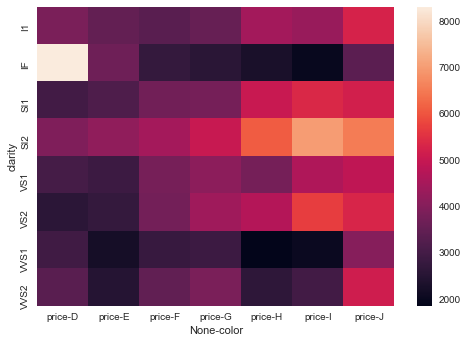

In [240]:
pivot_table = grouped_avg.pivot(index = 'clarity',columns = 'color')
sns.heatmap(pivot_table)
plt.show()

I see from above that the diamond with Clarity SI2 and color I has the highest price 7002.649123, the diamond with Clarity VVS1 and color H has the lowest price 1845.658120.

Color J is supposed to have the highest price, color E is supposed to have the lowest price, therefore, the result shows the clarity influence the price more.

From heatmap, the Clarity WS1 has the highest correlation with Color E, H and I in price. The clarity IF has the highest correlation with color H and I.

In [241]:
## Group the numeric variables by categorical variables 
data_group = diamond[['clarity','cut','price']]
grouped_avg = data_group.groupby(['cut','clarity'],as_index=False).mean()
grouped_avg

,cut,clarity,price
0,Fair,I1,3703.533333
1,Fair,IF,1912.333333
2,Fair,SI1,4208.279412
3,Fair,SI2,5173.916309
4,Fair,VS1,4165.141176
5,Fair,VS2,4174.724138
6,Fair,VVS1,3871.352941
7,Fair,VVS2,3349.768116
8,Good,I1,3596.635417
9,Good,IF,4098.323944


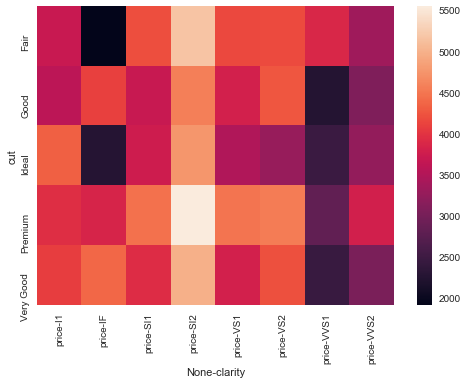

In [242]:
pivot_table = grouped_avg.pivot(index = 'cut',columns = 'clarity')
sns.heatmap(pivot_table)
plt.show()

I see from above that the diamond with Clarity SI2 and Premium cut has the highest price 5545.936928, the diamond with Clarity IF and Fair cut has the lowest price 1912.333333.

From heatmap, the cut Ideal has the highest correlation with Clarity IF in price, cut Fair has the highest correlation with Clarity IF in price.

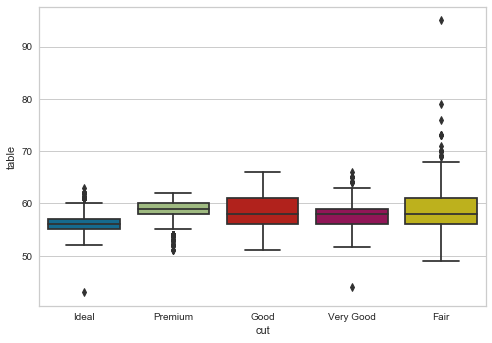

In [243]:
## plot boxplots with categorical variable cut
sns.boxplot(x='cut',y='table',data = diamond)

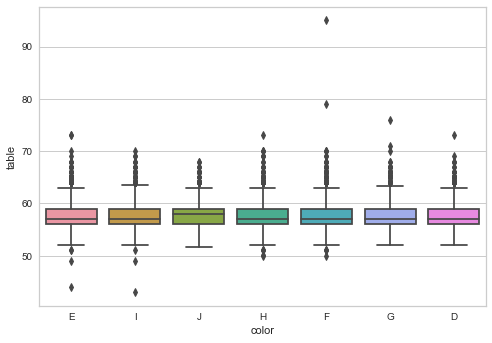

In [244]:
## plot boxplots with categorical variable color
sns.boxplot(x='color',y='table',data = diamond)

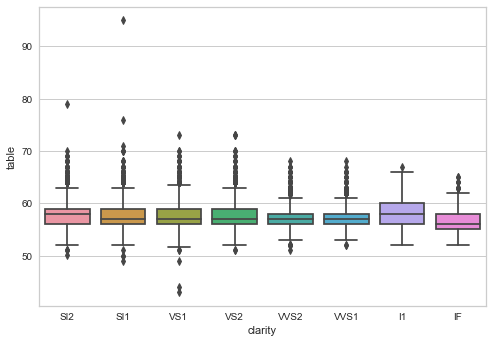

In [245]:
## plot boxplots with categorical variable clarity
sns.boxplot(x='clarity',y='table',data = diamond)

From above I could see that the table seems has no relation with color because different colors have almost the same table mean. The diamond with Premium cut has the highest mean of table, the diamond with Ideal cut has the lowest mean of table. And the diamond with I1 clarity has the highest mean of table. 

In [246]:
## Group the numeric variables by categorical variables 
data_group = diamond[['cut','clarity','table']]
grouped_avg = data_group.groupby(['cut','clarity'],as_index=False).mean()
grouped_avg

,cut,clarity,table
0,Fair,I1,58.114286
1,Fair,IF,59.111111
2,Fair,SI1,59.126961
3,Fair,SI2,58.828326
4,Fair,VS1,60.365294
5,Fair,VS2,59.050958
6,Fair,VVS1,61.235294
7,Fair,VVS2,59.237681
8,Good,I1,59.497917
9,Good,IF,59.056338


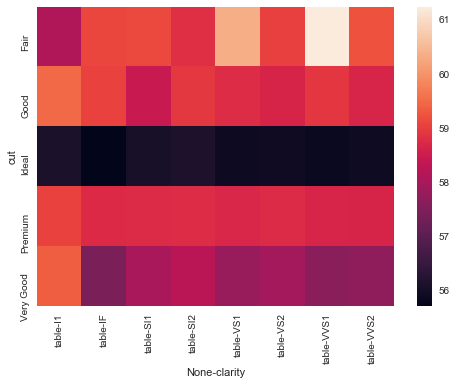

In [247]:
pivot_table = grouped_avg.pivot(index = 'cut',columns = 'clarity')
sns.heatmap(pivot_table)
plt.show()

I see from above that the diamond with Cut Fair and clarity VVS1 has the highest table 61.235294, the diamond with Cut Ideal and clarity IF has the lowest price 55.707013.

From heatmap, the Cut Ideal has the highest correlation with clarities in table. 

Next, I will plot some scatter plots to see the relations between numeric variables

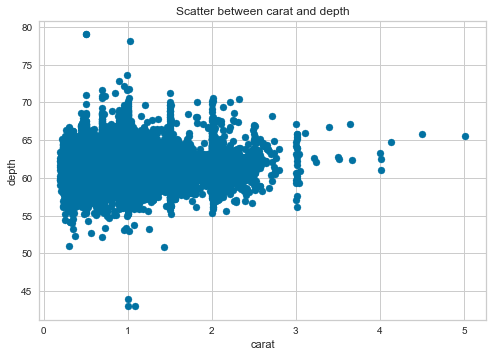

In [248]:
## Scatter plots between carat and depth
x = diamond['carat']
y = diamond['depth']
plt.scatter(x,y)
plt.title('Scatter between carat and depth')
plt.xlabel('carat')
plt.ylabel('depth')
plt.show()

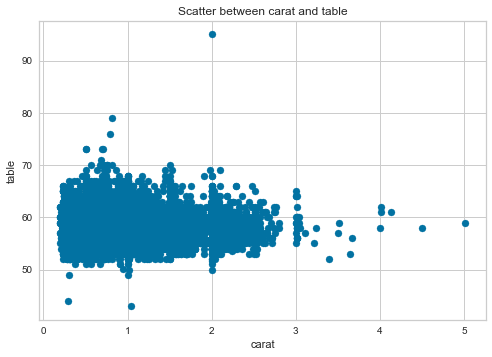

In [249]:
## Scatter plots between carat and table
x = diamond['carat']
y = diamond['table']
plt.scatter(x,y)
plt.title('Scatter between carat and table')
plt.xlabel('carat')
plt.ylabel('table')
plt.show()

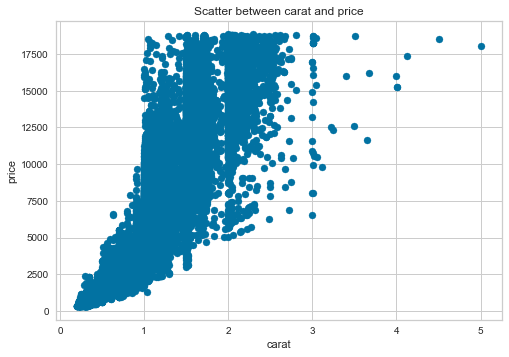

In [250]:
## Scatter plots between carat and price
x = diamond['carat']
y = diamond['price']
plt.scatter(x,y)
plt.title('Scatter between carat and price')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

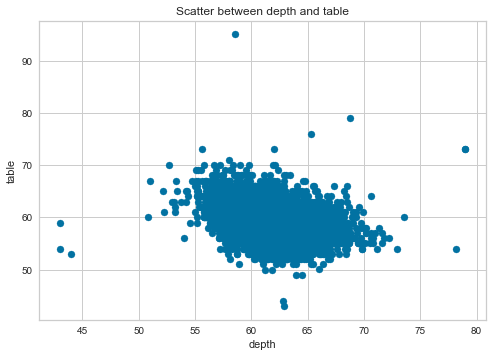

In [251]:
## Scatter plots between depth and table
x = diamond['depth']
y = diamond['table']
plt.scatter(x,y)
plt.title('Scatter between depth and table')
plt.xlabel('depth')
plt.ylabel('table')
plt.show()

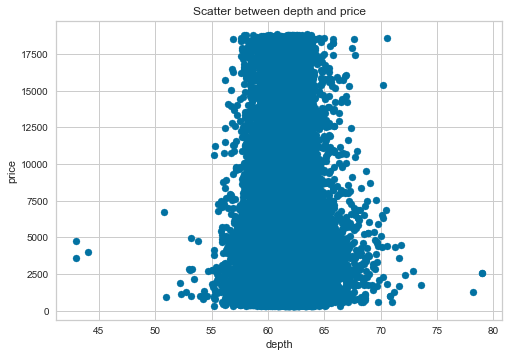

In [252]:
## Scatter plots between depth and price
x = diamond['depth']
y = diamond['price']
plt.scatter(x,y)
plt.title('Scatter between depth and price')
plt.xlabel('depth')
plt.ylabel('price')
plt.show()

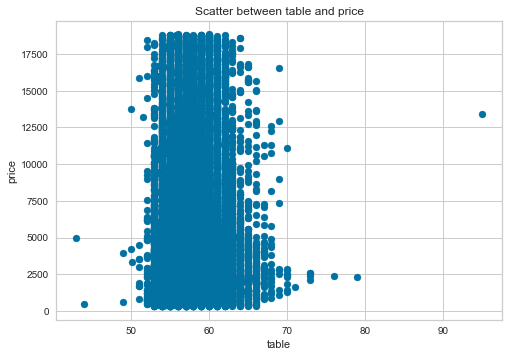

In [253]:
## Scatter plots between table and price
x = diamond['table']
y = diamond['price']
plt.scatter(x,y)
plt.title('Scatter between table and price')
plt.xlabel('table')
plt.ylabel('price')
plt.show()

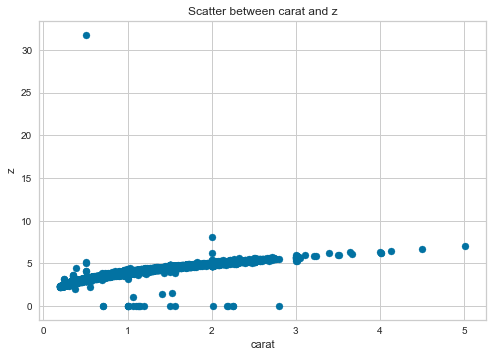

In [254]:
## Scatter plots between carat and z
x = diamond['carat']
y = diamond['z']
plt.scatter(x,y)
plt.title('Scatter between carat and z')
plt.xlabel('carat')
plt.ylabel('z')
plt.show()

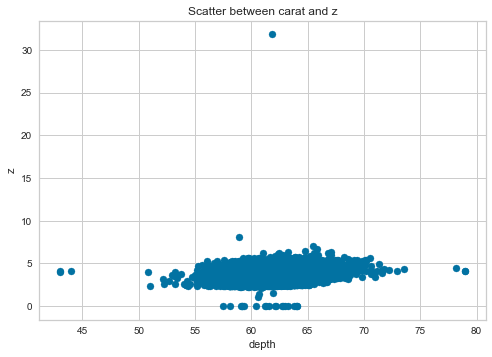

In [255]:
## Scatter plots between depth and z
x = diamond['depth']
y = diamond['z']
plt.scatter(x,y)
plt.title('Scatter between carat and z')
plt.xlabel('depth')
plt.ylabel('z')
plt.show()

From the scatter plots, I found that Carat 1 and 2 have most depth of 55-65, carat 0-3 have most table of 50-70, carat 1 has largest range of price, with carat inccreasing, the range of price is decreasing, the bigger carat is, the higher the price is. There is a cluster between depth and table. All kinds of depth has the same range of price, all kinds of table has the same range of price. The relationship between carat and z is linear with lots of outliers. z between 2-6 has largest range of depth.

## Data Preparation and EDA Review - Deal with outliers, standardize numeric variables.

My idea to handle the outliers is to check how many outliers in each numeric variables first, then decide whether to delete the outliers or to substitue them. If the outliers occupied large amounts of data, then delete them would cause insufficient information left to analyze. 

In [256]:
diamond2 = diamond.copy()
Q1 = diamond2.quantile(0.25)
Q3 = diamond2.quantile(0.75)
IQR = (Q3 - Q1)
print(IQR)

carat       0.64
depth       1.50
table       3.00
price    4374.25
x           1.83
y           1.82
z           1.13
dtype: float64


I got IQR for each numeric column. As I now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where have False that means these values are valid whereas True indicates presence of an outlier.

In [257]:
print (((diamond2 < (Q1 - 1.5 * IQR)) | (diamond2 > (Q3 + 1.5 * IQR))))

       carat  clarity  color    cut  depth  price  table      x      y      z
0      False    False  False  False  False  False  False  False  False  False
1      False    False  False  False  False  False  False  False  False  False
2      False    False  False  False   True  False   True  False  False  False
3      False    False  False  False  False  False  False  False  False  False
4      False    False  False  False  False  False  False  False  False  False
...      ...      ...    ...    ...    ...    ...    ...    ...    ...    ...
53935  False    False  False  False  False  False  False  False  False  False
53936  False    False  False  False  False  False  False  False  False  False
53937  False    False  False  False  False  False  False  False  False  False
53938  False    False  False  False  False  False  False  False  False  False
53939  False    False  False  False  False  False  False  False  False  False

[53940 rows x 10 columns]


In [258]:
diamond3 = diamond2[~((diamond2 < (Q1 - 1.5 * IQR)) |(diamond2 > (Q3 + 1.5 * IQR))).any(axis=1)]
diamond3.shape

(47524, 10)

In [259]:
diamond3

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The result shows that outliers only occupy seldom data, so it is safe to delete the outliers.

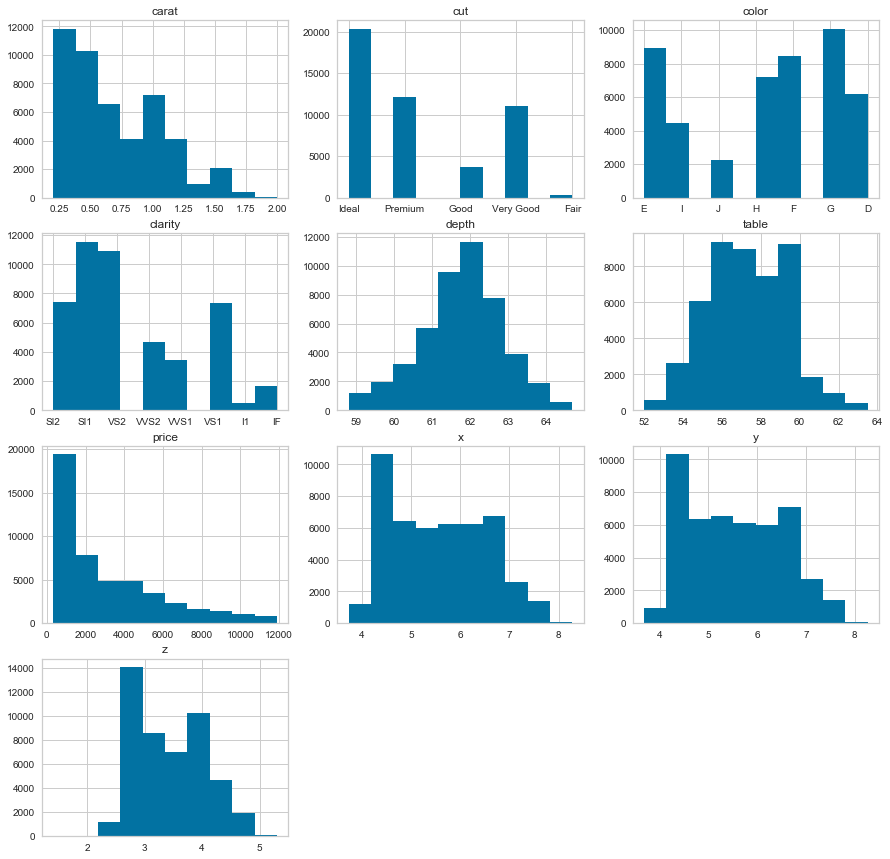

In [260]:
#next check distributions
plt.figure(figsize=(15,15))

#use an index to identify the spot of the subplot
j=1
columns=diamond3.columns.tolist()
for k in columns[0:] :   
    plt.subplot(4,3,j) 
    plt.hist(diamond3[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

I find that after removing the outliers, the distributions of depth has become normally distributed, the distribution of x change from normally distributed to no pattern. 

Next I will check the boxplots to see if there are any outliers.

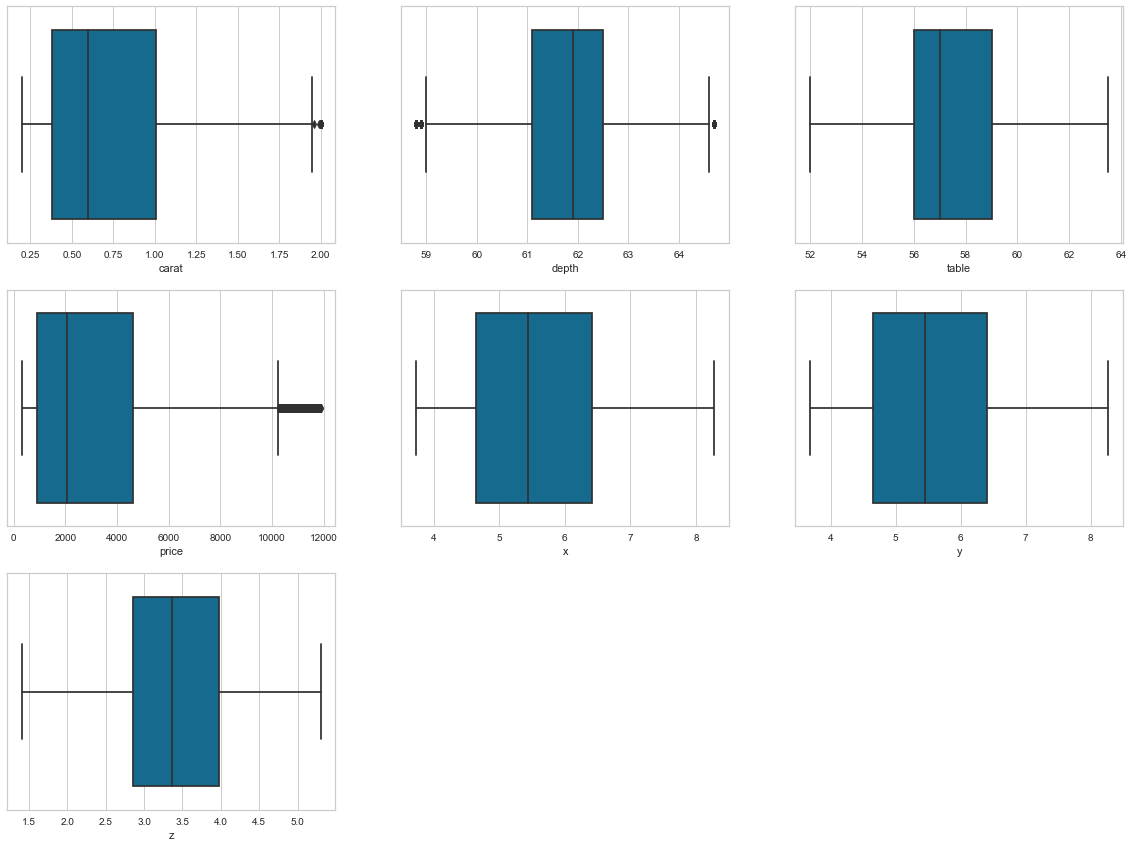

In [261]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,20))

diamondn = diamond3[['carat','depth','table','price','x','y','z']]
#use an index to identify the spot of the subplot
j=1
columns=diamondn.columns.tolist()
for k in columns[0:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(4,3,j) 
    sns.boxplot(x=k,data=diamondn)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

I find that after removing the outliers, most numeric variables do not have outliers anymore, while there are some ouliers in carat, depth and price. 

In [262]:
#check for number of outliers in carat, depth and price:
diamondo = diamond3[['carat','depth','price']]
columns=diamondo.columns.tolist()
#check for number of outliers per column
for k in columns:
    IQ3=diamondo[k].quantile(0.75)
    IQ1=diamondo[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('Number of outliers for variable %s:' %k, diamondo.shape[0]-diamondo[((diamondo[k]>=(IQ1-IQR)) & (diamondo[k]<=(IQ3+IQR))) | (diamondo[k].isnull())].shape[0])

Number of outliers for variable carat: 42
Number of outliers for variable depth: 391
Number of outliers for variable price: 1266


Although there appear to be outliers, I decided not to remove any of them. Because I previously have eliminated enough outliers.

I have already significantly reduced the size of the dataset from 53,941 rows to now 47,524 rows.

Next, I have to convert cut column values from ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'] to [0,1,2,3,4], convert color column values from ['E', 'I', 'J', 'H', 'F', 'G', 'D'] to [0,1,2,3,4,5,6], convert clarity column values from ['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'] to [0,1,2,3,4,5,6,7]. 

Also, I need to store the factor conversions to remember what number is substituting the text.
The code below will perform the following:

Use pandas factorize function to factorize the cut, color and clarity column in the dataset. This will create both factors and the definitions for the factors.
Store the factorized column as veilcolor.
Store the definitions for the factors.
Show the first five rows and the defintions array:

In [263]:
#Creating the dependent variable class
diamond4 = diamond3.copy()
factor = pd.factorize(diamond4['cut'])
diamond4.cut = factor[0]
definitions = factor[1]
print(diamond4.cut.head())
print(definitions)

0    0
1    1
3    1
4    2
5    3
Name: cut, dtype: int64
Index(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype='object')


In [264]:
#Creating the dependent variable class
factor = pd.factorize(diamond4['color'])
diamond4.color = factor[0]
definitions = factor[1]
print(diamond4.color.head())
print(definitions)

0    0
1    0
3    1
4    2
5    2
Name: color, dtype: int64
Index(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype='object')


In [265]:
#Creating the dependent variable class
factor = pd.factorize(diamond4['clarity'])
diamond4.clarity = factor[0]
definitions = factor[1]
print(diamond4.clarity.head())
print(definitions)

0    0
1    1
3    2
4    0
5    3
Name: clarity, dtype: int64
Index(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'], dtype='object')


Next I will create a dataset that is ready to be used for a model.

In [266]:
#create a dataset that is ready to be used for a model
target = diamond4['cut']
explanatory=diamond4[['color','clarity','carat','depth','table','price','x','y','z']]
diamondd=pd.concat([target,explanatory],axis=1)

#check results
diamondd.head()

,cut,color,clarity,carat,depth,table,price,x,y,z
0,0,0,0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,1,0,1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,1,1,2,0.29,62.4,58.0,334,4.20,4.23,2.63
4,2,2,0,0.31,63.3,58.0,335,4.34,4.35,2.75
5,3,2,3,0.24,62.8,57.0,336,3.94,3.96,2.48


In [267]:
#double check that there are no null values in these new columns
diamondd.isnull().sum()

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values in my dataset.

## Feature Selection

I will now examine the correlation matrix to identify possible relationships between the target variable and the explanatory variables. Since my target variable is a categorical variable, I will not use scatterplots as they would not be meaningful. 

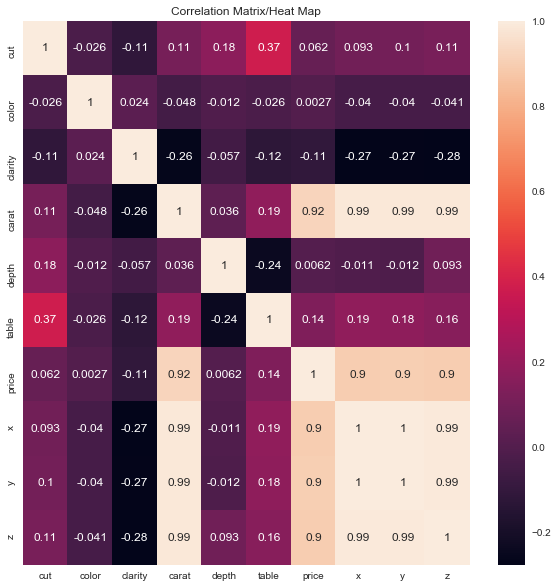

In [268]:
#next get correlation matrix and plot it using seaborn
plt.figure(figsize=(10, 10)) #set figure size
corrMatrix = diamondd.corr() #get correlation matrix
sns.heatmap(corrMatrix, annot=True) #graph correlation matrix
plt.title('Correlation Matrix/Heat Map') 
plt.show()

After transformation, table, depth, carat and z appear to be the variables most correlated with the target variables 'cut'.

## Ensemble Modeling

Now that I have my data prepared, I will begin building ensemble models to see which type of model as well as which features yield the best results.  
I will begin with building Decision Tree model.

### Does the cut attribute exhibit low entropy or high entropy?

In [269]:
diamondd['cut'].value_counts() 

0    20340
1    12115
3    10994
2     3745
4      330
Name: cut, dtype: int64

In [270]:
# calculate the entropy for cut
from math import log2
# proportion of examples in each class
class0 = 20340/47524
class1 = 12115/47524
class2 = 3745/47524
class3 = 10994/47524
class4 = 330/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.854 bits


From above, I could see that there are imbalanced samples, cut Ideal has 20340 samples, while cut Fair has 330 samples. 

- More than 42% of the values contained within the cut attribute are indicative of an "Ideal" cut. From calculation, it shows the target attribute has  __high entropy__.

- Furthermore, my __null error rate__ for my modeling work is __equivalent to the percentage of "Ideal" cut indicators__ present within the cut attribute: 42%

- Effective decision trees are built by identifying attributes that offer the __highest information gain__ and __lowest entropy__.

#### So which explonatory attributes offered high information gain + low entropy? I will use mutual information feature selection method and calculate entropy and gain information to find it:

In [271]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.000023
Feature 1: 0.021478
Feature 2: 0.061450
Feature 3: 0.281357
Feature 4: 0.306389
Feature 5: 0.099491
Feature 6: 0.090363
Feature 7: 0.078269
Feature 8: 0.064567


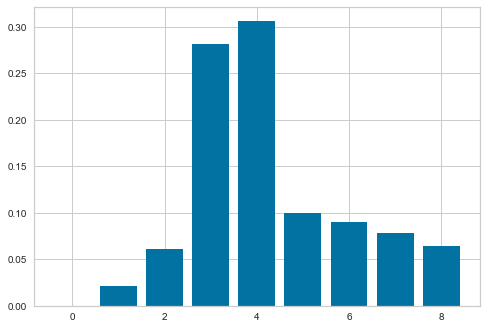

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The score shows that features 4, 3, 5, 6 and 7 are most relevant to the target. The bar chart also shows the same result.

- feature 4: table
- feature 3: depth
- feature 5: price
- feature 6: x
- feature 7: y
- feature 8: z

In [273]:
diamondd['table'].value_counts() 

56.0    9223
57.0    8880
58.0    7416
55.0    5859
59.0    5697
        ... 
61.8       1
62.4       1
61.3       1
61.6       1
63.3       1
Name: table, Length: 104, dtype: int64

This doesn’t convey much information as the output contains a lot of categories for every value of table. Instead, let’s group them into bins.

For convenience to calculate information gain for numeric variables, I will set the bin to 3.

In [274]:
diamondd['table'].value_counts(bins=3)

(55.833, 59.667]    31483
(51.987, 55.833]     9314
(59.667, 63.5]       6727
Name: table, dtype: int64

In [275]:
# calculate the entropy for table
from math import log2
# proportion of examples in each class
class0 = 31483/47524
class1 = 9314/47524
class2 = 6727/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.254 bits


In [276]:
diamondd['depth'].value_counts(bins=3)

(60.767, 62.733]    31048
(62.733, 64.7]       8540
(58.793, 60.767]     7936
Name: depth, dtype: int64

In [277]:
# calculate the entropy for depth
from math import log2
# proportion of examples in each class
class0 = 31048/47524
class1 = 8540/47524
class2 = 7936/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.277 bits


In [278]:
diamondd['price'].value_counts(bins=3)

(314.442, 4178.333]     33557
(4178.333, 8030.667]    10296
(8030.667, 11883.0]      3671
Name: price, dtype: int64

In [279]:
# calculate the entropy for price
from math import log2
# proportion of examples in each class
class0 = 33557/47524
class1 = 10296/47524
class2 = 3671/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.118 bits


In [280]:
diamondd['x'].value_counts(bins=3)

(3.724, 5.247]    21331
(5.247, 6.763]    20368
(6.763, 8.28]      5825
Name: x, dtype: int64

In [281]:
# calculate the entropy for x
from math import log2
# proportion of examples in each class
class0 = 21331/47524
class1 = 20368/47524
class2 = 5825/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.414 bits


In [282]:
diamondd['y'].value_counts(bins=3)

(5.21, 6.74]     20981
(3.674, 5.21]    20591
(6.74, 8.27]      5952
Name: y, dtype: int64

In [283]:
# calculate the entropy for y
from math import log2
# proportion of examples in each class
class0 = 20981/47524
class1 = 20591/47524
class2 = 5952/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.419 bits


In [284]:
diamondd['z'].value_counts(bins=3)

(2.707, 4.003]    30953
(4.003, 5.3]      10527
(1.405, 2.707]     6044
Name: z, dtype: int64

In [285]:
# calculate the entropy for z
from math import log2
# proportion of examples in each class
class0 = 30953/47524
class1 = 10527/47524
class2 = 6044/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.263 bits


In [286]:
diamondd['color'].value_counts(bins=3)

(4.0, 6.0]       16276
(2.0, 4.0]       15642
(-0.007, 2.0]    15606
Name: color, dtype: int64

In [287]:
# calculate the entropy for color
from math import log2
# proportion of examples in each class
class0 = 16276/47524
class1 = 15642/47524
class2 = 15606/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.585 bits


In [288]:
diamondd['clarity'].value_counts(bins=3)

(-0.008, 2.333]    29882
(4.667, 7.0]        9496
(2.333, 4.667]      8146
Name: clarity, dtype: int64

In [289]:
# calculate the entropy for clarity
from math import log2
# proportion of examples in each class
class0 = 29882/47524
class1 = 9496/47524
class2 = 8146/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.321 bits


In [290]:
diamondd['cut'].value_counts(bins=4)

(-0.005, 1.0]    32455
(2.0, 3.0]       10994
(1.0, 2.0]        3745
(3.0, 4.0]         330
Name: cut, dtype: int64

In [291]:
# calculate the entropy for cut
from math import log2
# proportion of examples in each class
class0 = 32455/47524
class1 = 10994/47524
class2 = 3745/47524
class3 = 330/47524
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 1.203 bits


Calculate information gain for each variables:

In [292]:
## Calculate number of table in different categories
def counttable1(s,t):
    return ((s > 51.987) & (s <= 55.833) & (t > -0.005) & (t <= 1.0)).sum()
def counttable2(s,t):
    return ((s > 51.987) & (s <= 55.833) & (t > 1.0) & (t <= 2.0)).sum()
def counttable3(s,t):
    return ((s > 51.987) & (s <= 55.833) & (t > 2.0) & (t <= 3.0)).sum()
def counttable4(s,t):
    return ((s > 51.987) & (s <= 55.833) & (t > 3.0) & (t <= 4.0)).sum()
def counttable11(s,t):
    return ((s > 55.833) & (s <= 59.667) & (t > -0.005) & (t <= 1.0)).sum()
def counttable22(s,t):
    return ((s > 55.833) & (s <= 59.667) & (t > 1.0) & (t <= 2.0)).sum()
def counttable33(s,t):
    return ((s > 55.833) & (s <= 59.667) & (t > 2.0) & (t <= 3.0)).sum()
def counttable44(s,t):
    return ((s > 55.833) & (s <= 59.667) & (t > 3.0) & (t <= 4.0)).sum()
def counttable111(s,t):
    return ((s > 59.667) & (s <= 63.5) & (t > -0.005) & (t <= 1.0)).sum()
def counttable222(s,t):
    return ((s > 59.667) & (s <= 63.5) & (t > 1.0) & (t <= 2.0)).sum()
def counttable333(s,t):
    return ((s > 59.667) & (s <= 63.5) & (t > 2.0) & (t <= 3.0)).sum()
def counttable444(s,t):
    return ((s > 59.667) & (s <= 63.5) & (t > 3.0) & (t <= 4.0)).sum()

In [293]:
counttable1(diamondd['table'],diamondd['cut'])

7362

In [294]:
counttable2(diamondd['table'],diamondd['cut'])

585

In [295]:
counttable3(diamondd['table'],diamondd['cut'])

1318

In [296]:
counttable4(diamondd['table'],diamondd['cut'])

49

In [297]:
counttable11(diamondd['table'],diamondd['cut'])

21679

In [298]:
counttable22(diamondd['table'],diamondd['cut'])

2114

In [299]:
counttable33(diamondd['table'],diamondd['cut'])

7505

In [300]:
counttable44(diamondd['table'],diamondd['cut'])

185

In [301]:
counttable111(diamondd['table'],diamondd['cut'])

3414

In [302]:
counttable222(diamondd['table'],diamondd['cut'])

1046

In [303]:
counttable333(diamondd['table'],diamondd['cut'])

2171

In [304]:
counttable444(diamondd['table'],diamondd['cut'])

96

In [305]:
## Calculate number of depth in different categories
def countdepth1(a,b):
    return ((a > 58.793) & (a <= 60.767) & (b > -0.005) & (b <= 1.0)).sum()
def countdepth2(a,b):
    return ((a > 58.793) & (a <= 60.767) & (b > 1.0) & (b <= 2.0)).sum()
def countdepth3(a,b):
    return ((a > 58.793) & (a <= 60.767) & (b > 2.0) & (b <= 3.0)).sum()
def countdepth4(a,b):
    return ((a > 58.793) & (a <= 60.767) & (b > 3.0) & (b <= 4.0)).sum()
def countdepth11(a,b):
    return ((a > 60.767) & (a <= 62.733) & (b > -0.005) & (b <= 1.0)).sum()
def countdepth22(a,b):
    return ((a > 60.767) & (a <= 62.733) & (b > 1.0) & (b <= 2.0)).sum()
def countdepth33(a,b):
    return ((a > 60.767) & (a <= 62.733) & (b > 2.0) & (b <= 3.0)).sum()
def countdepth44(a,b):
    return ((a > 60.767) & (a <= 62.733) & (b > 3.0) & (b <= 4.0)).sum()
def countdepth111(a,b):
    return ((a > 62.733) & (a <= 64.7) & (b > -0.005) & (b <= 1.0)).sum()
def countdepth222(a,b):
    return ((a > 62.733) & (a <= 64.7) & (b > 1.0) & (b <= 2.0)).sum()
def countdepth333(a,b):
    return ((a > 62.733) & (a <= 64.7) & (b > 2.0) & (b <= 3.0)).sum()
def countdepth444(a,b):
    return ((a > 62.733) & (a <= 64.7) & (b > 3.0) & (b <= 4.0)).sum()

In [306]:
countdepth1(diamondd['depth'],diamondd['cut'])

5305

In [307]:
countdepth2(diamondd['depth'],diamondd['cut'])

354

In [308]:
countdepth3(diamondd['depth'],diamondd['cut'])

2256

In [309]:
countdepth4(diamondd['depth'],diamondd['cut'])

21

In [310]:
countdepth11(diamondd['depth'],diamondd['cut'])

25600

In [311]:
countdepth22(diamondd['depth'],diamondd['cut'])

428

In [312]:
countdepth33(diamondd['depth'],diamondd['cut'])

4991

In [313]:
countdepth44(diamondd['depth'],diamondd['cut'])

29

In [314]:
countdepth111(diamondd['depth'],diamondd['cut'])

1550

In [315]:
countdepth222(diamondd['depth'],diamondd['cut'])

2963

In [316]:
countdepth333(diamondd['depth'],diamondd['cut'])

3747

In [317]:
countdepth444(diamondd['depth'],diamondd['cut'])

280

In [318]:
## Calculate number of price in different categories
def countprice1(c,d):
    return ((c > 314.442) & (c <= 4178.333) & (d > -0.005) & (d <= 1.0)).sum()
def countprice2(c,d):
    return ((c > 314.442) & (c <= 4178.333) & (d > 1.0) & (d <= 2.0)).sum()
def countprice3(c,d):
    return ((c > 314.442) & (c <= 4178.333) & (d > 2.0) & (d <= 3.0)).sum()
def countprice4(c,d):
    return ((c > 314.442) & (c <= 4178.333) & (d > 3.0) & (d <= 4.0)).sum()
def countprice11(c,d):
    return ((c > 4178.333) & (c <= 8030.667) & (d > -0.005) & (d <= 1.0)).sum()
def countprice22(c,d):
    return ((c > 4178.333) & (c <= 8030.667) & (d > 1.0) & (d <= 2.0)).sum()
def countprice33(c,d):
    return ((c > 4178.333) & (c <= 8030.667) & (d > 2.0) & (d <= 3.0)).sum()
def countprice44(c,d):
    return ((c > 4178.333) & (c <= 8030.667) & (d > 3.0) & (d <= 4.0)).sum()
def countprice111(c,d):
    return ((c > 8030.667) & (c <= 11883) & (d > -0.005) & (d <= 1.0)).sum()
def countprice222(c,d):
    return ((c > 8030.667) & (c <= 11883) & (d > 1.0) & (d <= 2.0)).sum()
def countprice333(c,d):
    return ((c > 8030.667) & (c <= 11883) & (d > 2.0) & (d <= 3.0)).sum()
def countprice444(c,d):
    return ((c > 8030.667) & (c <= 11883) & (d > 3.0) & (d <= 4.0)).sum()

In [319]:
countprice1(diamondd['price'],diamondd['cut'])

23275

In [320]:
countprice2(diamondd['price'],diamondd['cut'])

2556

In [321]:
countprice3(diamondd['price'],diamondd['cut'])

7511

In [322]:
countprice4(diamondd['price'],diamondd['cut'])

215

In [323]:
countprice11(diamondd['price'],diamondd['cut'])

6589

In [324]:
countprice22(diamondd['price'],diamondd['cut'])

951

In [325]:
countprice33(diamondd['price'],diamondd['cut'])

2660

In [326]:
countprice44(diamondd['price'],diamondd['cut'])

96

In [327]:
countprice111(diamondd['price'],diamondd['cut'])

2591

In [328]:
countprice222(diamondd['price'],diamondd['cut'])

238

In [329]:
countprice333(diamondd['price'],diamondd['cut'])

823

In [330]:
countprice444(diamondd['price'],diamondd['cut'])

19

In [331]:
## Calculate number of x in different categories
def countx1(e,f):
    return ((e > 3.724) & (e <= 5.247) & (f > -0.005) & (f <= 1.0)).sum()
def countx2(e,f):
    return ((e > 3.724) & (e <= 5.247) & (f > 1.0) & (f <= 2.0)).sum()
def countx3(e,f):
    return ((e > 3.724) & (e <= 5.247) & (f > 2.0) & (f <= 3.0)).sum()
def countx4(e,f):
    return ((e > 3.724) & (e <= 5.247) & (f > 3.0) & (f <= 4.0)).sum()
def countx11(e,f):
    return ((e > 5.247) & (e <= 6.763) & (f > -0.005) & (f <= 1.0)).sum()
def countx22(e,f):
    return ((e > 5.247) & (e <= 6.763) & (f > 1.0) & (f <= 2.0)).sum()
def countx33(e,f):
    return ((e > 5.247) & (e <= 6.763) & (f > 2.0) & (f <= 3.0)).sum()
def countx44(e,f):
    return ((e > 5.247) & (e <= 6.763) & (f > 3.0) & (f <= 4.0)).sum()
def countx111(e,f):
    return ((e > 6.763) & (e <= 8.28) & (f > -0.005) & (f <= 1.0)).sum()
def countx222(e,f):
    return ((e > 6.763) & (e <= 8.28) & (f > 1.0) & (f <= 2.0)).sum()
def countx333(e,f):
    return ((e > 6.763) & (e <= 8.28) & (f > 2.0) & (f <= 3.0)).sum()
def countx444(e,f):
    return ((e > 6.763) & (e <= 8.28) & (f > 3.0) & (f <= 4.0)).sum()

In [332]:
countx1(diamondd['x'],diamondd['cut'])

15445

In [333]:
countx2(diamondd['x'],diamondd['cut'])

1416

In [334]:
countx3(diamondd['x'],diamondd['cut'])

4418

In [335]:
countx4(diamondd['x'],diamondd['cut'])

52

In [336]:
countx11(diamondd['x'],diamondd['cut'])

12838

In [337]:
countx22(diamondd['x'],diamondd['cut'])

1946

In [338]:
countx33(diamondd['x'],diamondd['cut'])

5359

In [339]:
countx44(diamondd['x'],diamondd['cut'])

225

In [340]:
countx111(diamondd['x'],diamondd['cut'])

4172

In [341]:
countx222(diamondd['x'],diamondd['cut'])

383

In [342]:
countx333(diamondd['x'],diamondd['cut'])

1217

In [343]:
countx444(diamondd['x'],diamondd['cut'])

53

In [344]:
## Calculate number of y in different categories
def county1(g,h):
    return ((g > 3.674) & (g <= 5.21) & (h > -0.005) & (h <= 1.0)).sum()
def county2(g,h):
    return ((g > 3.674) & (g <= 5.21) & (h > 1.0) & (h <= 2.0)).sum()
def county3(g,h):
    return ((g > 3.674) & (g <= 5.21) & (h > 2.0) & (h <= 3.0)).sum()
def county4(g,h):
    return ((g > 3.674) & (g <= 5.21) & (h > 3.0) & (h <= 4.0)).sum()
def county11(g,h):
    return ((g > 5.21) & (g <= 6.74) & (h > -0.005) & (h <= 1.0)).sum()
def county22(g,h):
    return ((g > 5.21) & (g <= 6.74) & (h > 1.0) & (h <= 2.0)).sum()
def county33(g,h):
    return ((g > 5.21) & (g <= 6.74) & (h > 2.0) & (h <= 3.0)).sum()
def county44(g,h):
    return ((g > 5.21) & (g <= 6.74) & (h > 3.0) & (h <= 4.0)).sum()
def county111(g,h):
    return ((g > 6.74) & (g <= 8.27) & (h > -0.005) & (h <= 1.0)).sum()
def county222(g,h):
    return ((g > 6.74) & (g <= 8.27) & (h > 1.0) & (h <= 2.0)).sum()
def county333(g,h):
    return ((g > 6.74) & (g <= 8.27) & (h > 2.0) & (h <= 3.0)).sum()
def county444(g,h):
    return ((g > 6.74) & (g <= 8.27) & (h > 3.0) & (h <= 4.0)).sum()

In [345]:
county1(diamondd['y'],diamondd['cut'])

14926

In [346]:
county2(diamondd['y'],diamondd['cut'])

1387

In [347]:
county3(diamondd['y'],diamondd['cut'])

4223

In [348]:
county4(diamondd['y'],diamondd['cut'])

55

In [349]:
county11(diamondd['y'],diamondd['cut'])

13387

In [350]:
county22(diamondd['y'],diamondd['cut'])

1960

In [351]:
county33(diamondd['y'],diamondd['cut'])

5409

In [352]:
county44(diamondd['y'],diamondd['cut'])

225

In [353]:
county111(diamondd['y'],diamondd['cut'])

4142

In [354]:
county222(diamondd['y'],diamondd['cut'])

398

In [355]:
county333(diamondd['y'],diamondd['cut'])

1362

In [356]:
county444(diamondd['y'],diamondd['cut'])

50

In [357]:
## Calculate number of z in different categories
def countz1(i,j):
    return ((i > 1.405) & (i <= 2.707) & (j > -0.005) & (j <= 1.0)).sum()
def countz2(i,j):
    return ((i > 1.405) & (i <= 2.707) & (j > 1.0) & (j <= 2.0)).sum()
def countz3(i,j):
    return ((i > 1.405) & (i <= 2.707) & (j > 2.0) & (j <= 3.0)).sum()
def countz4(i,j):
    return ((i > 1.405) & (i <= 2.707) & (j > 3.0) & (j <= 4.0)).sum()
def countz11(i,j):
    return ((i > 2.707) & (i <= 4.003) & (j > -0.005) & (j <= 1.0)).sum()
def countz22(i,j):
    return ((i > 2.707) & (i <= 4.003) & (j > 1.0) & (j <= 2.0)).sum()
def countz33(i,j):
    return ((i > 2.707) & (i <= 4.003) & (j > 2.0) & (j <= 3.0)).sum()
def countz44(i,j):
    return ((i > 2.707) & (i <= 4.003) & (j > 3.0) & (j <= 4.0)).sum()
def countz111(i,j):
    return ((i > 4.003) & (i <= 5.3) & (j > -0.005) & (j <= 1.0)).sum()
def countz222(i,j):
    return ((i > 4.003) & (i <= 5.3) & (j > 1.0) & (j <= 2.0)).sum()
def countz333(i,j):
    return ((i > 4.003) & (i <= 5.3) & (j > 2.0) & (j <= 3.0)).sum()
def countz444(i,j):
    return ((i > 4.003) & (i <= 5.3) & (j > 3.0) & (j <= 4.0)).sum()

In [358]:
countz1(diamondd['z'],diamondd['cut'])

4331

In [359]:
countz2(diamondd['z'],diamondd['cut'])

179

In [360]:
countz3(diamondd['z'],diamondd['cut'])

1527

In [361]:
countz4(diamondd['z'],diamondd['cut'])

7

In [362]:
countz11(diamondd['z'],diamondd['cut'])

21153

In [363]:
countz22(diamondd['z'],diamondd['cut'])

2559

In [364]:
countz33(diamondd['z'],diamondd['cut'])

7044

In [365]:
countz44(diamondd['z'],diamondd['cut'])

197

In [366]:
countz111(diamondd['z'],diamondd['cut'])

6971

In [367]:
countz222(diamondd['z'],diamondd['cut'])

1007

In [368]:
countz333(diamondd['z'],diamondd['cut'])

2423

In [369]:
countz444(diamondd['z'],diamondd['cut'])

126

In [370]:
## Calculate number of color in different categories
def countcolor1(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > -0.005) & (l <= 1.0)).sum()
def countcolor2(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > 1.0) & (l <= 2.0)).sum()
def countcolor3(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > 2.0) & (l <= 3.0)).sum()
def countcolor4(k,l):
    return ((k > -0.007) & (k <= 2.0) & (l > 3.0) & (l <= 4.0)).sum()
def countcolor11(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > -0.005) & (l <= 1.0)).sum()
def countcolor22(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > 1.0) & (l <= 2.0)).sum()
def countcolor33(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > 2.0) & (l <= 3.0)).sum()
def countcolor44(k,l):
    return ((k > 2.0) & (k <= 4.0) & (l > 3.0) & (l <= 4.0)).sum()
def countcolor111(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > -0.005) & (l <= 1.0)).sum()
def countcolor222(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > 1.0) & (l <= 2.0)).sum()
def countcolor333(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > 2.0) & (l <= 3.0)).sum()
def countcolor444(k,l):
    return ((k > 4.0) & (k <= 6.0) & (l > 3.0) & (l <= 4.0)).sum()

In [371]:
countcolor1(diamondd['color'],diamondd['cut'])

10379

In [372]:
countcolor2(diamondd['color'],diamondd['cut'])

1294

In [373]:
countcolor3(diamondd['color'],diamondd['cut'])

3847

In [374]:
countcolor4(diamondd['color'],diamondd['cut'])

86

In [375]:
countcolor11(diamondd['color'],diamondd['cut'])

10662

In [376]:
countcolor22(diamondd['color'],diamondd['cut'])

1234

In [377]:
countcolor33(diamondd['color'],diamondd['cut'])

3628

In [378]:
countcolor44(diamondd['color'],diamondd['cut'])

118

In [379]:
countcolor111(diamondd['color'],diamondd['cut'])

11414

In [380]:
countcolor222(diamondd['color'],diamondd['cut'])

1217

In [381]:
countcolor333(diamondd['color'],diamondd['cut'])

3519

In [382]:
countcolor444(diamondd['color'],diamondd['cut'])

126

In [383]:
## Calculate number of color in different categories
def countclarity1(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > -0.005) & (n <= 1.0)).sum()
def countclarity2(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > 1.0) & (n <= 2.0)).sum()
def countclarity3(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > 2.0) & (n <= 3.0)).sum()
def countclarity4(m,n):
    return ((m > -0.008) & (m <= 2.333) & (n > 3.0) & (n <= 4.0)).sum()
def countclarity11(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > -0.005) & (n <= 1.0)).sum()
def countclarity22(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > 1.0) & (n <= 2.0)).sum()
def countclarity33(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > 2.0) & (n <= 3.0)).sum()
def countclarity44(m,n):
    return ((m > 2.333) & (m <= 4.667) & (n > 3.0) & (n <= 4.0)).sum()
def countclarity111(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > -0.005) & (n <= 1.0)).sum()
def countclarity222(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > 1.0) & (n <= 2.0)).sum()
def countclarity333(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > 2.0) & (n <= 3.0)).sum()
def countclarity444(m,n):
    return ((m > 4.667) & (m <= 7.0) & (n > 3.0) & (n <= 4.0)).sum()

In [384]:
countclarity1(diamondd['clarity'],diamondd['cut'])

19725

In [385]:
countclarity2(diamondd['clarity'],diamondd['cut'])

2770

In [386]:
countclarity3(diamondd['clarity'],diamondd['cut'])

7143

In [387]:
countclarity4(diamondd['clarity'],diamondd['cut'])

244

In [388]:
countclarity11(diamondd['clarity'],diamondd['cut'])

5854

In [389]:
countclarity22(diamondd['clarity'],diamondd['cut'])

365

In [390]:
countclarity33(diamondd['clarity'],diamondd['cut'])

1913

In [391]:
countclarity44(diamondd['clarity'],diamondd['cut'])

14

In [392]:
countclarity111(diamondd['clarity'],diamondd['cut'])

6876

In [393]:
countclarity222(diamondd['clarity'],diamondd['cut'])

610

In [394]:
countclarity333(diamondd['clarity'],diamondd['cut'])

1938

In [395]:
countclarity444(diamondd['clarity'],diamondd['cut'])

72

I can caculate the information gain of table:

In [396]:
# calculate the information gain for table
from math import log2
# proportion of examples in each class
class1 = 7362/31483
class2 = 585/31483
class3 = 1318/31483
class4 = 49/31483
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 21679/9314
class22 = 2114/9314
class33 = 7505/9314
class44 = 185/9314
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 3414/6727
class222 = 1046/6727
class333 = 2171/6727
class444 = 96/6727
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (31483/47524)*entropy1 - (9314/47524)*entropy2 - (6727/47524)*entropy3
print('information gain of table: %.3f bits' % final)

entropy1: 0.803 bits
entropy2: -1.168 bits
entropy3: 1.528 bits
information gain of table: 0.684 bits


I can caculate the information gain of depth:

In [397]:
# calculate the information gain for depth
from math import log2
# proportion of examples in each class
class1 = 5305/31048
class2 = 354/31048
class3 = 2256/31048
class4 = 21/31048
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 25600/8540
class22 = 428/8540
class33 = 4991/8540
class44 = 29/8540
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 1550/7936
class222 = 2963/7936
class333 = 3747/7936
class444 = 280/7936
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (31048/47524)*entropy1 - (8540/47524)*entropy2 - (7936/47524)*entropy3
print('information gain of depth: %.3f bits' % final)

entropy1: 0.791 bits
entropy2: -3.944 bits
entropy3: 1.672 bits
information gain of depth: 1.116 bits


I can caculate the information gain of price:

In [398]:
# calculate the information gain for price
from math import log2
# proportion of examples in each class
class1 = 23275/33557
class2 = 2556/33557
class3 = 7511/33557
class4 = 215/33557
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 6589/10296
class22 = 951/10296
class33 = 2660/10296
class44 = 96/10296
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 2591/3671
class222 = 238/3671
class333 = 823/3671
class444 = 19/3671
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (31048/47524)*entropy1 - (8540/47524)*entropy2 - (7936/47524)*entropy3
print('information gain of price: %.3f bits' % final)

entropy1: 1.179 bits
entropy2: 1.323 bits
entropy3: 1.134 bits
information gain of price: 0.006 bits


I can caculate the information gain of x:

In [399]:
# calculate the information gain for x
from math import log2
# proportion of examples in each class
class1 = 15445/21331
class2 = 1416/21331
class3 = 4418/21331
class4 = 52/21331
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 12838/20368
class22 = 1946/20368
class33 = 5359/20368
class44 = 225/20368
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 4172/5825
class222 = 383/5825
class333 = 1217/5825
class444 = 53/5825
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (21331/47524)*entropy1 - (20368/47524)*entropy2 - (5825/47524)*entropy3
print('information gain of x: %.3f bits' % final)

entropy1: 1.089 bits
entropy2: 1.372 bits
entropy3: 1.137 bits
information gain of x: -0.013 bits


I can caculate the information gain of y:

In [400]:
# calculate the information gain for y
from math import log2
# proportion of examples in each class
class1 = 14926/20981
class2 = 1387/20981
class3 = 4223/20981
class4 = 55/20981
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 13387/20591
class22 = 1960/20591
class33 = 5409/20591
class44 = 225/20591
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 4142/5952
class222 = 398/5952
class333 = 1362/5952
class444 = 50/5952
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (20981/47524)*entropy1 - (20591/47524)*entropy2 - (5952/47524)*entropy3
print('information gain of y: %.3f bits' % final)

entropy1: 1.097 bits
entropy2: 1.355 bits
entropy3: 1.170 bits
information gain of y: -0.015 bits


I can caculate the information gain of z:

In [401]:
# calculate the information gain for z
from math import log2
# proportion of examples in each class
class1 = 4331/30953
class2 = 179/30953
class3 = 1527/30953
class4 = 7/30953
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 21153/10527
class22 = 2559/10527
class33 = 7044/10527
class44 = 197/10527
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 6971/6044
class222 = 1007/6044
class333 = 2423/6044
class444 = 126/6044
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (30953/47524)*entropy1 - (10527/47524)*entropy2 - (6044/47524)*entropy3
print('information gain of z: %.3f bits' % final)

entropy1: 0.657 bits
entropy2: 0.279 bits
entropy3: 0.838 bits
information gain of z: 0.607 bits


I can caculate the information gain of color:

In [402]:
# calculate the information gain for color
from math import log2
# proportion of examples in each class
class1 = 10379/16276
class2 = 1294/16276
class3 = 3847/16276
class4 = 86/16276
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 10662/15642
class22 = 1234/15642
class33 = 3628/15642
class44 = 118/15642
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 11414/15606
class222 = 1217/15606
class333 = 3519/15606
class444 = 126/15606
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (16276/47524)*entropy1 - (15642/47524)*entropy2 - (15606/47524)*entropy3
print('information gain of color: %.3f bits' % final)

entropy1: 1.236 bits
entropy2: 1.207 bits
entropy3: 1.158 bits
information gain of color: 0.002 bits


I can caculate the information gain of clarity:

In [403]:
# calculate the information gain for clarity
from math import log2
# proportion of examples in each class
class1 = 19725/29882
class2 = 2770/29882
class3 = 7143/29882
class4 = 244/29882
# calculate entropy
entropy1 = -(class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3) + class4 * log2(class4))
# print the result
print('entropy1: %.3f bits' % entropy1)
# proportion of examples in each class
class11 = 5854/9496
class22 = 365/9496
class33 = 1913/9496
class44 = 14/9496
# calculate entropy
entropy2 = -(class11 * log2(class11) + class22 * log2(class2) + class33 * log2(class33) + class44 * log2(class44))
# print the result
print('entropy2: %.3f bits' % entropy2)
# proportion of examples in each class
class111 = 6876/8146
class222 = 610/8146
class333 = 1938/8146
class444 = 72/8146
# calculate entropy
entropy3 = -(class111 * log2(class111) + class222 * log2(class222) + class333 * log2(class333) + class444 * log2(class444))
# print the result
print('entropy3: %.3f bits' % entropy3)
final = 1.203 - (29882/47524)*entropy1 - (9496/47524)*entropy2 - (8146/47524)*entropy3
print('information gain of clarity: %.3f bits' % final)

entropy1: 1.264 bits
entropy2: 1.042 bits
entropy3: 1.040 bits
information gain of clarity: 0.022 bits


Then I would make a table to compare their entropy and information gain:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>table </th>
      <th>depth</th>
      <th>price</th>
      <th>x</th>
      <th>y</th>
      <th>z</th>
      <th>color</th>
      <th>clarity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>entropy</td>
      <th>1.254</th>
      <th>1.277</th>
      <th>1.118</th>
      <th>1.414</th>
      <th>1.419</th>
      <th>1.263</th>
      <th>1.585</th>
      <th>1.321</th>
    </tr>
    <tr>
      <td>information gain</td>
      <th>0.684</th>
      <th>1.116</th>
      <th>0.006</th>
      <th>-0.013</th>
      <th>-0.015</th>
      <th>0.607</th>
      <th>0.002</th>
      <th>0.022</th>
      </tr>
  </tbody>
</table>

From the table, for entropy: price < table < z < depth < clarity < x < y < color, for information gain: depth > table > z > clarity > price > color > x > y. For Mutual information selection: table > depth > price > x > y > z > carat > clarity > color. 

since my aim is to find the variables with low entropy and high information gain, therefore, the variables price, table, depth, and z are suitable to construct the Decision Tree model.

### Decision Tree Model  - Using Selected Features

For my Decision Tree Model model I will utilize the variables which had the low entropy and high information gain with the target variable (price, table, depth, z) as features to predict my target variable.  

Now I will try to normalize or standardize the numeric variables. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. Since in the EDA part, I found that the standard deviation of price is much bigger than other variables' standard deviation, so I choose to standardize my features.

In [404]:
#Standardize the data attributes.
from sklearn import preprocessing
# separate the data and target attributes
X = diamondd[['price','table','depth','z']]
# standardize the data attributes
diamondscale = preprocessing.scale(X)
diamondscale

array([[-1.01236319, -1.11805686, -0.25907612, -1.64707247],
       [-1.01236319,  1.84999085, -1.79628671, -1.84504263],
       [-1.00945375,  0.36596699,  0.55474125, -1.3171222 ],
       ...,
       [-0.12825636,  1.35531623,  0.91643786,  0.21714656],
       [-0.12825636,  0.36596699, -0.71119688,  0.5141018 ],
       [-0.12825636, -1.11805686,  0.37389295,  0.34912667]])

###  1. Decision Tree model with features selected above.

In [405]:
# fit a decision tree on an imbalanced classification dataset
X = diamondscale
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

tree = DecisionTreeClassifier().fit(X_sm, y_sm)
# Predicted class
print(tree.predict(X_test))

[0 0 0 ... 1 1 1]


Print the multi-label confusion matrix:

In [406]:
y_pred = tree.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 6975,  1181],
        [ 1333,  4769]],

       [[ 9187,  1436],
        [ 1501,  2134]],

       [[12634,   500],
        [  442,   682]],

       [[ 8943,  2017],
        [ 1948,  1350]],

       [[14030,   129],
        [   39,    60]]])

Calculating accuracy for each class:

In [407]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
(tp + tn) / (tn + fp + tp + fn)

array([0.82367794, 0.79401038, 0.93393183, 0.72191051, 0.98821714])

Calculating precision for each class:

In [408]:
tp / (tp + fp)

array([0.80151261, 0.5977591 , 0.57698816, 0.4009504 , 0.31746032])

Calculating recall for each class:

In [409]:
tp / (tp + fn)

array([0.78154703, 0.58707015, 0.60676157, 0.40933899, 0.60606061])

Calculating specificity for each class:

In [410]:
tn / (tn + fp)

array([0.85519863, 0.86482161, 0.96193087, 0.81596715, 0.99088919])

Calculating f1 score for each class:

In [411]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.79140392, 0.59236641, 0.59150043, 0.40510128, 0.41666667])

### Plot the ROC curve:

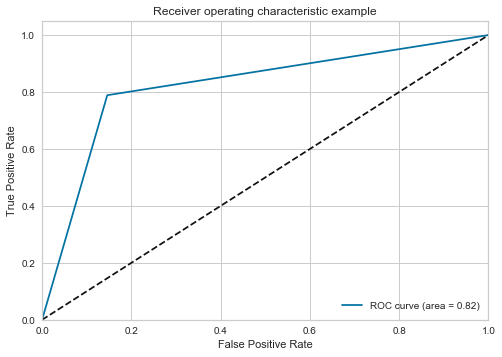

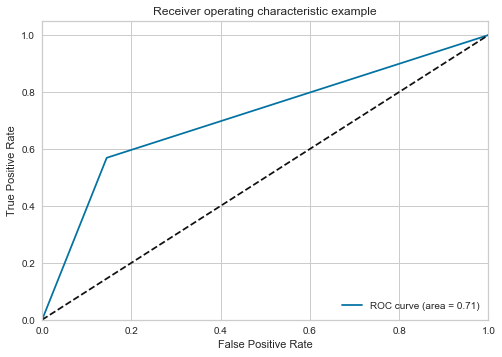

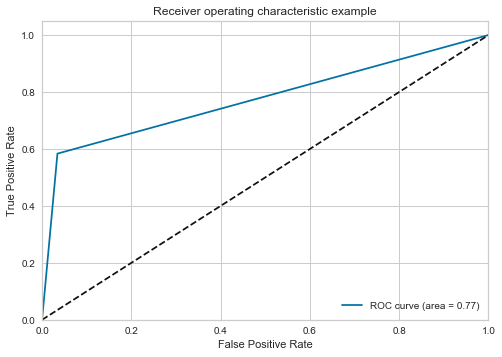

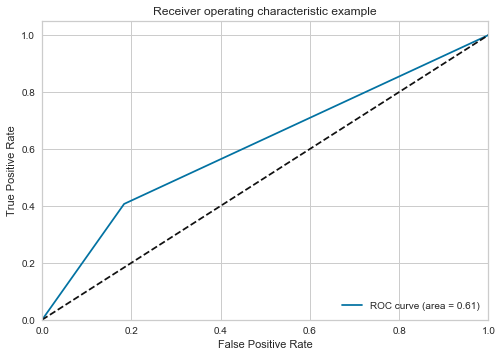

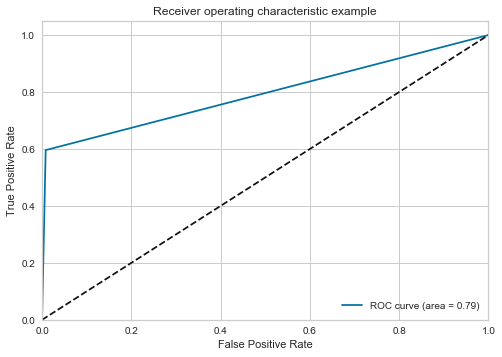

In [412]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X = diamondscale
y = diamond3['cut'].values

y = label_binarize(y, classes=['Ideal','Premium','Good','Very Good','Fair'])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
y_pred = tree.predict(X_test)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

###  2. Random Forest model with features selected above.

In [413]:
# fit a random forest tree on an imbalanced classification dataset
X = diamondscale
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

forest = RandomForestClassifier().fit(X_sm, y_sm)

print(forest.predict(X_test))

[0 0 0 ... 1 1 1]


Print the multi-label confusion matrix:

In [414]:
y_pred = forest.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 7004,  1152],
        [  652,  5450]],

       [[ 9173,  1450],
        [ 1005,  2630]],

       [[12820,   314],
        [  428,   696]],

       [[ 9798,  1162],
        [ 2051,  1247]],

       [[14072,    87],
        [   29,    70]]])

Calculating accuracy for each class:

In [415]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
(tp + tn) / (tn + fp + tp + fn)

array([0.87347454, 0.82781596, 0.94795904, 0.77465283, 0.99186422])

Calculating precision for each class:

In [416]:
tp / (tp + fp)

array([0.82550742, 0.64460784, 0.68910891, 0.51764218, 0.44585987])

Calculating recall for each class:

In [417]:
tp / (tp + fn)

array([0.89314979, 0.72352132, 0.61921708, 0.37810794, 0.70707071])

Calculating specificity for each class:

In [418]:
tn / (tn + fp)

array([0.85875429, 0.86350372, 0.97609258, 0.8939781 , 0.9938555 ])

Calculating f1 score for each class:

In [419]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.85799748, 0.68178872, 0.65229616, 0.43700718, 0.546875  ])

### Plot the ROC curve:

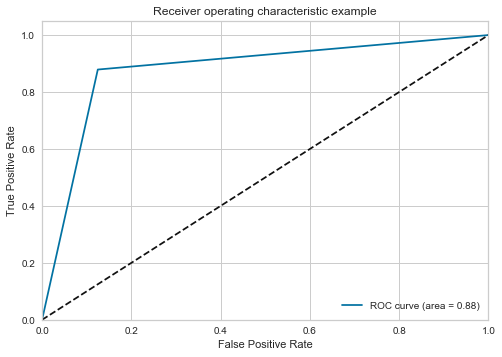

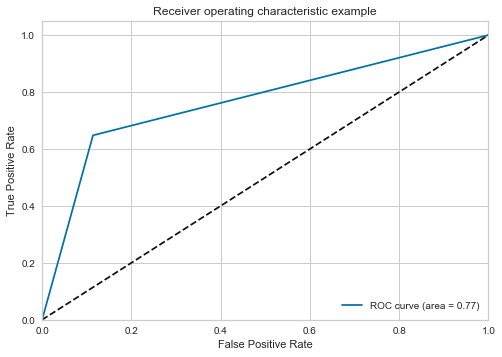

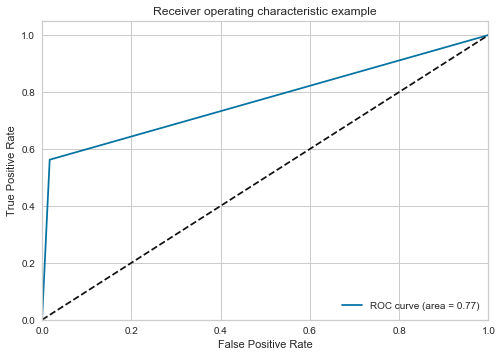

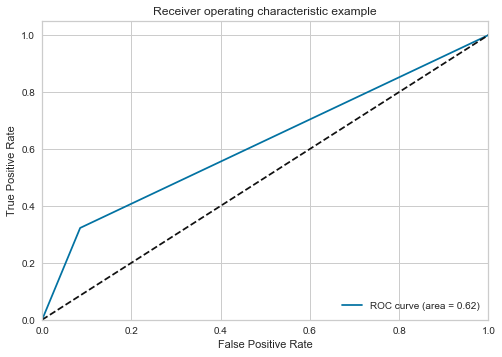

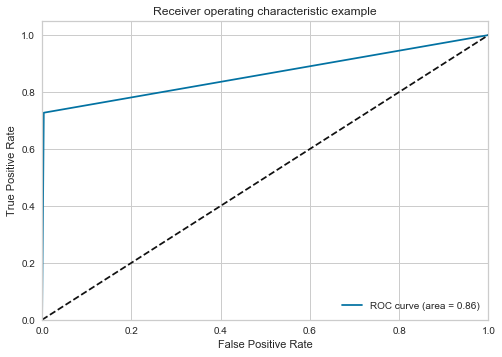

In [420]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X = diamondscale
y = diamond3['cut'].values

y = label_binarize(y, classes=['Ideal','Premium','Good','Very Good','Fair'])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_sm, y_sm)
y_pred = forest.predict(X_test)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

###  3. Gradient Boosting Classifier with features selected above.

In [421]:
# fit a gradient boosting classifier on an imbalanced classification dataset
X = diamondscale
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

boosting = GradientBoostingClassifier().fit(X_sm, y_sm)
# Predicted class
print(boosting.predict(X_test))

[0 0 0 ... 1 1 1]


Print the multi-label confusion matrix:

In [422]:
y_pred = boosting.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 6958,  1198],
        [  530,  5572]],

       [[ 8966,  1657],
        [  575,  3060]],

       [[12966,   168],
        [  436,   688]],

       [[10363,   597],
        [ 2137,  1161]],

       [[14074,    85],
        [   27,    72]]])

Calculating accuracy for each class:

In [423]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
(tp + tn) / (tn + fp + tp + fn)

array([0.87880488, 0.84345631, 0.95763782, 0.808248  , 0.99214476])

Calculating precision for each class:

In [424]:
tp / (tp + fp)

array([0.82304284, 0.64871741, 0.80373832, 0.66040956, 0.45859873])

Calculating recall for each class:

In [425]:
tp / (tp + fn)

array([0.91314323, 0.84181568, 0.61209964, 0.35203153, 0.72727273])

Calculating specificity for each class:

In [426]:
tn / (tn + fp)

array([0.85311427, 0.8440177 , 0.98720877, 0.9455292 , 0.99399675])

Calculating f1 score for each class:

In [427]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.86575513, 0.73275862, 0.69494949, 0.45925633, 0.5625    ])

### Plot the ROC curve:

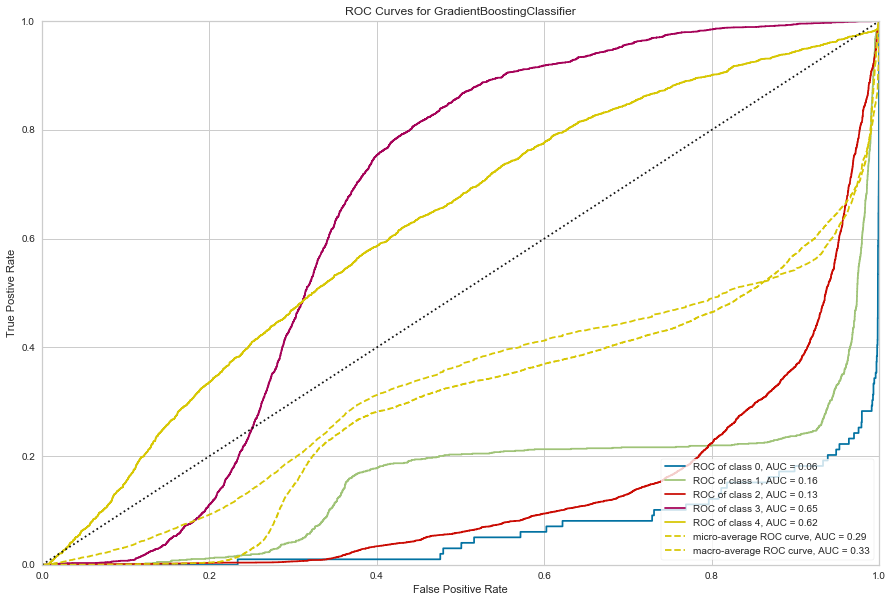

In [428]:
!pip install yellowbrick
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
X = diamondscale
y = diamond3['cut'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)
rocauc = ROCAUC(boosting, size=(1080, 720))
rocauc.score(X_test, y_test)  
r = rocauc.poof()

###  4. Stochastic Gradient Descent Classifier with features selected above.

In [429]:
# fit a gradient boosting classifier on an imbalanced classification dataset
X = diamondscale
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

stochastic = SGDClassifier().fit(X_sm, y_sm)
# Predicted class
print(stochastic.predict(X_test))

[0 0 0 ... 3 3 0]


Print the multi-label confusion matrix:

In [430]:
y_pred = stochastic.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 5504,  2652],
        [  381,  5721]],

       [[ 9903,   720],
        [ 2714,   921]],

       [[13134,     0],
        [ 1124,     0]],

       [[ 9570,  1390],
        [ 2786,   512]],

       [[11895,  2264],
        [   21,    78]]])

Calculating accuracy for each class:

In [431]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
(tp + tn) / (tn + fp + tp + fn)

array([0.78727732, 0.75915276, 0.92116706, 0.7071118 , 0.83973909])

Calculating precision for each class:

In [432]:
tp / (tp + fp)

array([0.68326765, 0.56124314,        nan, 0.26919033, 0.03330487])

Calculating recall for each class:

In [433]:
tp / (tp + fn)

array([0.93756146, 0.25337001, 0.        , 0.1552456 , 0.78787879])

Calculating specificity for each class:

In [434]:
tn / (tn + fp)

array([0.67484061, 0.93222254, 1.        , 0.87317518, 0.8401017 ])

Calculating f1 score for each class:

In [435]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.79046632, 0.34912813,        nan, 0.19692308, 0.06390823])

### Plot ROC curve

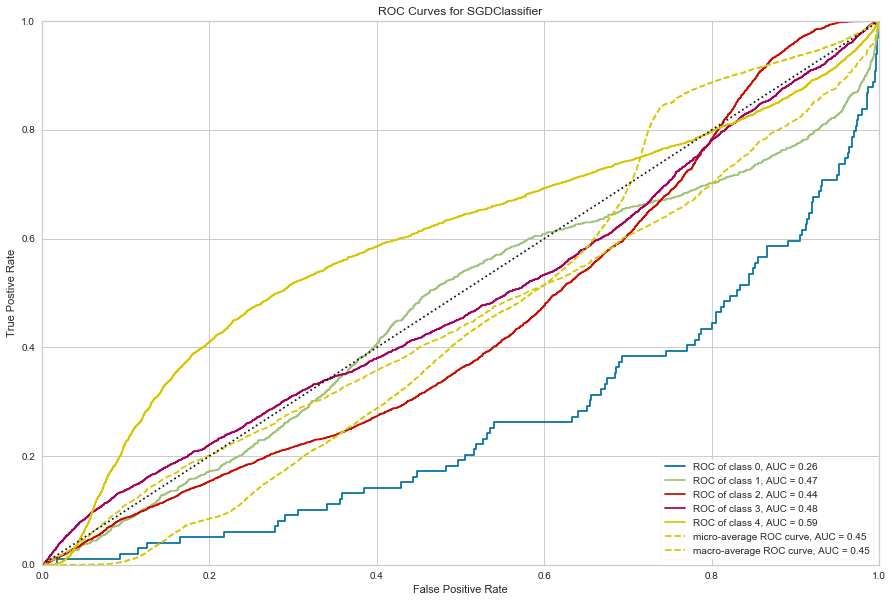

In [436]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
X = diamondscale
y = diamond3['cut'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)
rocauc = ROCAUC(stochastic, size=(1080, 720))
rocauc.score(X_test, y_test)  
r = rocauc.poof()

### 5. XG Boost Classifier with features selected above

In [437]:
!brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> Updated Formulae
Updated 176 formulae.

To reinstall 10.0.0, run `brew reinstall libomp`


In [438]:
!pip3 install xgboost

In [439]:
# fit a gradient boosting classifier on an imbalanced classification dataset
X = diamondscale
y = diamondd['cut'].values
# Partition data into training and test sets
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

xgboosting = XGBClassifier().fit(X_sm, y_sm)
# Predicted class
print(xgboosting.predict(X_test))

[0 0 0 ... 1 1 1]


Print the multi-label confusion matrix:

In [440]:
y_pred = xgboosting.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 6952,  1204],
        [  519,  5583]],

       [[ 9107,  1516],
        [  649,  2986]],

       [[12933,   201],
        [  410,   714]],

       [[10293,   667],
        [ 2049,  1249]],

       [[14093,    66],
        [   27,    72]]])

Calculating accuracy for each class:

In [441]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
(tp + tn) / (tn + fp + tp + fn)

array([0.87915556, 0.84815542, 0.95714686, 0.80951045, 0.99347735])

Calculating precision for each class:

In [442]:
tp / (tp + fp)

array([0.82260203, 0.66326077, 0.78032787, 0.65187891, 0.52173913])

Calculating recall for each class:

In [443]:
tp / (tp + fn)

array([0.91494592, 0.82145805, 0.63523132, 0.37871437, 0.72727273])

Calculating specificity for each class:

In [444]:
tn / (tn + fp)

array([0.85237862, 0.85729078, 0.98469621, 0.93914234, 0.99533865])

Calculating f1 score for each class:

In [445]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.86632012, 0.73393142, 0.70034331, 0.47909474, 0.60759494])

### Plot the ROC curve:

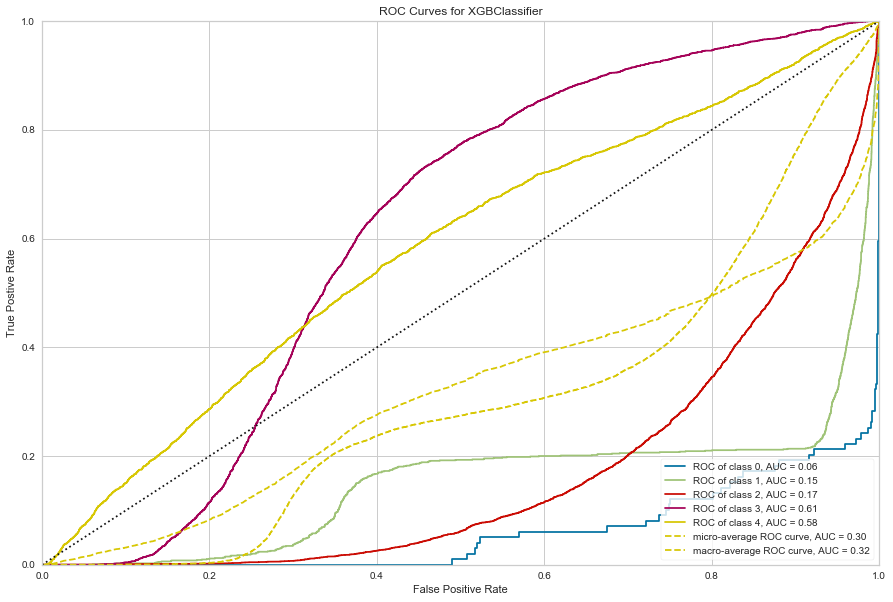

In [446]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
X = diamondscale
y = diamond3['cut'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                  random_state=0, stratify=y)
rocauc = ROCAUC(xgboosting, size=(1080, 720))
rocauc.score(X_test, y_test)  
r = rocauc.poof()

Then I will make a table to compare their Accuracy: 

<table>
  <thead>
    <tr>
      <th>Comparative term: Accuracy</th>
      <th>Decision Tree </th>
      <th>Random Forest</th>
      <th>Gradient Boosting Classifier</th>
      <th>Stochastic Gradient Descent Classifier</th>
      <th>XG Boost Classifier</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy for Ideal</td>
      <th>0.82367794</th>
      <th>0.87347454</th>
      <th>0.87880488</th>
      <th>0.78727732</th>
      <th>0.87915556</th>
    </tr>
    <tr>
      <td>Accuracy for Premium</td>
      <th>0.79401038</th>
      <th>0.82781596</th>
      <th>0.84345631</th>
      <th>0.75915276</th>
      <th>0.84815542</th>
      </tr>
     <tr>
      <td>Accuracy for Good</td>
      <th>0.93393183</th>
      <th>0.94795904</th>
      <th>0.95763782</th>
      <th>0.92116706</th>
      <th>0.95714686</th>
      </tr>
     <tr>
      <td>Accuracy for Very Good</td>
      <th>0.72191051</th>
      <th>0.77465283</th>
      <th>0.808248</th>
      <th>0.7071118</th>
      <th>0.80951045</th>
      </tr>
     <tr>
      <td>Accuracy for Fair</td>
      <th>0.98821714</th>
      <th>0.99186422</th>
      <th>0.99214476</th>
      <th>0.83973909</th>
      <th>0.99347735</th>
      </tr>
  </tbody>
</table>

### Temporary Conclusion:
1. Ideal accuracy: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier
2. Premium accuracy: XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier
3. Good accuracy: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier
4. Very Good accuracy: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Stochastic Gradient Descent Classifier > Decision Tree.
5. Fair accuracy: XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier

In comparing accuracy, XG Boost classifier and Gradient Boosting Classifier performs best, Stochastic Gradient Descent Classifier performs worst. 

Then I will make a table to compare their Precision: 

<table>
  <thead>
    <tr>
      <th>Comparative term: Precision</th>
      <th>Decision Tree </th>
      <th>Random Forest</th>
      <th>Gradient Boosting Classifier</th>
      <th>Stochastic Gradient Descent Classifier</th>
      <th>XG Boost Classifier</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Precision for Ideal</td>
      <th>0.80151261</th>
      <th>0.82550742</th>
      <th>0.82304284</th>
      <th>0.68326765</th>
      <th>0.82260203</th>
    </tr>
    <tr>
      <td>Precision for Premium</td>
      <th>0.5977591</th>
      <th>0.64460784</th>
      <th>0.64871741</th>
      <th>0.56124314</th>
      <th>0.66326077</th>
      </tr>
     <tr>
      <td>Precision for Good</td>
      <th>0.57698816</th>
      <th>0.68910891</th>
      <th>0.80373832</th>
      <th>nan</th>
      <th>0.78032787</th>
      </tr>
     <tr>
      <td>Precision for Very Good</td>
      <th>0.4009504</th>
      <th>0.51764218</th>
      <th>0.66040956</th>
      <th>0.26919033</th>
      <th>0.65187891</th>
      </tr>
     <tr>
      <td>Precision for Fair</td>
      <th>0.31746032</th>
      <th>0.44585987</th>
      <th>0.45859873</th>
      <th>0.03330487</th>
      <th>0.52173913</th>
      </tr>
  </tbody>
</table>

### Temporary Conclusion:
1. Ideal precision: Gradient Boosting Classifier > Random Forest > XG Boost Classifier > Decision Tree > Stochastic Gradient Descent Classifier
2. Premium precision: XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Stochastic Gradient Descent Classifier > Decision Tree
3. Good precision: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree
4. Very Good precision: Gradient Boosting Classifier > XG Boost Classifier > Random Forest >  Decision Tree > Stochastic Gradient Descent Classifier
5. Fair precision: XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier

In comparing precision, XG Boost classifier and Gradient Boosting Classifier performs best, Stochastic Gradient Descent Classifier performs worst. 

Then I will make a table to compare their Recall:

<table>
  <thead>
    <tr>
      <th>Comparative term: Recall</th>
      <th>Decision Tree </th>
      <th>Random Forest</th>
      <th>Gradient Boosting Classifier</th>
      <th>Stochastic Gradient Descent Classifier</th>
      <th>XG Boost Classifier</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Recall for Ideal</td>
      <th>0.78154703</th>
      <th>0.89314979</th>
      <th>0.91314323</th>
      <th>0.93756146</th>
      <th>0.91494592</th>
    </tr>
    <tr>
      <td>Recall for Premium</td>
      <th>0.58707015</th>
      <th>0.72352132</th>
      <th>0.84181568</th>
      <th>0.25337001</th>
      <th>0.82145805</th>
      </tr>
     <tr>
      <td>Recall for Good</td>
      <th>0.60676157</th>
      <th>0.61921708</th>
      <th>0.61209964</th>
      <th>0</th>
      <th>0.63523132</th>
      </tr>
     <tr>
      <td>Recall for Very Good</td>
      <th>0.40933899</th>
      <th>0.37810794</th>
      <th>0.35203153</th>
      <th>0.1552456</th>
      <th>0.37871437</th>
      </tr>
     <tr>
      <td>Recall for Fair</td>
      <th>0.60606061</th>
      <th>0.70707071</th>
      <th>0.72727273</th>
      <th>0.78787879</th>
      <th>0.72727273</th>
      </tr>
  </tbody>
</table>

### Temporary Conclusion:
1. Ideal recall: Stochastic Gradient Descent Classifier > XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Decision Tree
2. Premium recall: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier
3. Good recall: Random Forest > XG Boost Classifier > Gradient Boosting Classifier > Decision Tree > Stochastic Gradient Descent Classifier
4. Very Good recall: Decision Tree > XG Boost Classifier > Random Forest > Gradient Boosting Classifier > Stochastic Gradient Descent Classifier
5. Fair recall: Stochastic Gradient Descent Classifier > Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree

In comparing recall, XG Boost classifier and Gradient Boosting Classifier performs best, Stochastic Gradient Descent Classifier performs worst. 

Then I will make a table to compare their Specificity:

<table>
  <thead>
    <tr>
      <th>Comparative term: Specificity</th>
      <th>Decision Tree </th>
      <th>Random Forest</th>
      <th>Gradient Boosting Classifier</th>
      <th>Stochastic Gradient Descent Classifier</th>
      <th>XG Boost Classifier</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Specificity for Ideal</td>
      <th>0.85519863</th>
      <th>0.85875429</th>
      <th>0.85311427</th>
      <th>0.67484061</th>
      <th>0.85237862</th>
    </tr>
    <tr>
      <td>Specificity for Premium</td>
      <th>0.86482161</th>
      <th>0.86350372</th>
      <th>0.8440177</th>
      <th>0.93222254</th>
      <th>0.85729078</th>
      </tr>
     <tr>
      <td>Specificity for Good</td>
      <th>0.96193087</th>
      <th>0.97609258</th>
      <th>0.98720877</th>
      <th>1</th>
      <th>0.98469621</th>
      </tr>
     <tr>
      <td>Specificity for Very Good</td>
      <th>0.81596715</th>
      <th>0.8929781</th>
      <th>0.9455292</th>
      <th>0.87317518</th>
      <th>0.93914234</th>
      </tr>
     <tr>
      <td>Specificity for Fair</td>
      <th>0.99088919</th>
      <th>0.9938555</th>
      <th>0.99399675</th>
      <th>0.8401017</th>
      <th>0.99533865</th>
      </tr>
  </tbody>
</table>

### Temporary Conclusion:
1. Ideal specificity: Random Forest > Gradient Boosting Classifier > Decision Tree > XG Boost Classifier > Stochastic Gradient Descent Classifier
2. Premium specificity: Stochastic Gradient Descent Classifier > Random Forest > Decision Tree > XG Boost Classifier > Gradient Boosting Classifier  
3. Good specificity: Stochastic Gradient Descent Classifier > Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree
4. Very Good specificity: Stochastic Gradient Descent Classifier > Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree.
5. Fair specificity: XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Decision Tree >  Stochastic Gradient Descent Classifier 

In comparing specificity, Stochastic Gradient Descent Classifier performs best, Decision Tree performs worst. 

Then I will make a table to compare their f1 score:

<table>
  <thead>
    <tr>
      <th>Comparative term: f1 score</th>
      <th>Decision Tree </th>
      <th>Random Forest</th>
      <th>Gradient Boosting Classifier</th>
      <th>Stochastic Gradient Descent Classifier</th>
      <th>XG Boost Classifier</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>f1 score for Ideal</td>
      <th>0.79140392</th>
      <th>0.85799748</th>
      <th>0.86575513</th>
      <th>0.79046632</th>
      <th>0.86632012</th>
    </tr>
    <tr>
      <td>f1 score for Premium</td>
      <th>0.59236641</th>
      <th>0.67936755</th>
      <th>0.73275862</th>
      <th>0.55333833</th>
      <th>0.73393142</th>
      </tr>
     <tr>
      <td>f1 score for Good</td>
      <th>0.59150043</th>
      <th>0.65229616</th>
      <th>0.69494949</th>
      <th>nan</th>
      <th>0.70034331</th>
      </tr>
     <tr>
      <td>f1 score for Very Good</td>
      <th>0.40510128</th>
      <th>0.43700718</th>
      <th>0.45925633</th>
      <th>0.19692308</th>
      <th>0.47909474</th>
      </tr>
     <tr>
      <td>f1 score for Fair</td>
      <th>0.41666667</th>
      <th>0.546875</th>
      <th>0.5625</th>
      <th>0.06390823</th>
      <th>0.60759494</th>
      </tr>
  </tbody>
</table>

### Temporary Conclusion:
1. Ideal f1 score: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier
2. Premium f1 score: Gradient Boosting Classifier >  XG Boost Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier
3. Good f1 score: Gradient Boosting Classifier > XG Boost Classifier > Random Forest > Decision Tree
4. Very Good f1 score: XG Boost Classifier > Gradient Boosting Classifier > Random Forest  > Decision Tree > Stochastic Gradient Descent Classifier
5. Fair f1 score: XG Boost Classifier > Gradient Boosting Classifier > Random Forest > Decision Tree > Stochastic Gradient Descent Classifier 

In comparing f1 score, XG Boost classifier and Gradient Boosting Classifier performs best, Stochastic Gradient Descent Classifier performs worst. 

## Conclustion:

1. I make a very detailed explanatory Data analysis in the beginning, I found there are lots of outliers existing, some of the variables are skwed distributed, most of the variables are in no pattern. 

2. From EDA, I found carat, price x, y, and z are highly correlated.

3. From EDA, I found specific color matters on in specific cut.

4. From correlation heatmap, I found the variables table, depth, carat and z are highly corrlated with target variable 'cut'.

5. From Mutual information selection, the features it suggest are table, depth, price and x.

6. I calculated variables' entropy and information gain in aim to find low entropy and high information variables, the variables with low entropy and high informations are: price, table, depth, z. I chose them to be the exploratory variales I use to construct models.

7. I construct Decison Tree model, Random Forest Model, Gradient Boosting Classifier, Stochastic Gradient Descent Classifer, XG Boost Classifier one by one using the same exploratory variables I chose above.

8. I make confusion matrix for each model, calculting each model's accuracy, precision, recall, specificity and f1 score one by one, also I plot ROC curve for each model.

9. I make a table to compare the metrics among the models I constructed, finally I get the conslusion: In generally, the XG Boost Classifier and Gradient Boosting Classifer perform best, and Stochastic Gradient Descent Classifier performs worst.

I think this is because of the nature of the stochastic Gradient Descent Classifier, in stochastic gradient descent I use a single datapoint or example to calculate the gradient and update the weights with every iteration. As I frequently update the weights, Cost fucntion fluctuates heavily. If the training data is not sufficiently randomized, the algorithm will likely perform poorly, In my dataset, the dataset is not randomized enough.


Therefore, Gradient Boosting Classifier and XG boost Classifier are the best model in my mind. 